In [4823]:
#importing necessary libraries
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder, LabelEncoder, PowerTransformer
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score,roc_curve, roc_auc_score, plot_roc_curve
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor,RandomForestClassifier, BaggingClassifier
from sklearn.metrics import confusion_matrix, classification_report
from scipy.stats import norm, stats
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import statistics as st
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import time
#import csv

#import plotty
import warnings
warnings.filterwarnings('ignore')

In [4824]:
df1 = pd.read_excel(r"C:\Users\hp-pc\Desktop\Projects\Evaluation\Flight price prediction\Flight_Ticket_Participant_Datasets\Flight_Ticket_Participant_Datasets\Data_Train.xlsx")
df1.head() #read the excel file
#df1 is train data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4825]:
df2 = pd.read_excel(r"C:\Users\hp-pc\Desktop\Projects\Evaluation\Flight price prediction\Flight_Ticket_Participant_Datasets\Flight_Ticket_Participant_Datasets\Test_set.xlsx")
df2.head() #read the excel file
#df2 is test data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [4826]:
df3 = pd.read_excel(r"C:\Users\hp-pc\Desktop\Projects\Evaluation\Flight price prediction\Flight_Ticket_Participant_Datasets\Flight_Ticket_Participant_Datasets\Sample_submission.xlsx")
df3.head() #read the excel file
#df3 is sample submission

,Price
0,15998
1,16612
2,25572
3,25778
4,16934


In [4827]:
#Train data parameters

In [4828]:
df1.shape #check the shape of the train data dataset

(10683, 11)

In [4829]:
df1.describe() #check the parameters

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [4830]:
df1.info() #check the null values and data type of the train dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [4831]:
df1.duplicated().sum() #check the duplicate values

220

In [4832]:
df1.drop_duplicates(inplace=True) #drop duplicate rows

In [4833]:
df1.duplicated().sum() #check the duplicate values

0

In [4834]:
df1.columns #check the columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [4835]:
#Test data parameters

In [4836]:
df2.shape #check the shape of the test data dataset

(2671, 10)

In [4837]:
df2.describe() #check the parameters

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,2671,2671,2671,2671,2671,2671,2671,2671,2671,2671
unique,11,44,5,6,100,199,704,320,5,6
top,Jet Airways,9/05/2019,Delhi,Cochin,DEL → BOM → COK,10:00,19:00,2h 50m,1 stop,No info
freq,897,144,1145,1145,624,62,113,122,1431,2148


In [4838]:
df2.info() #check the null values and dtype of the test dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [4839]:
df2.duplicated().sum() #check the duplicate value

26

In [4840]:
df2.drop_duplicates(inplace = True) #drop the duplicate

In [4841]:
df2.duplicated().sum() #check the duplicate value

0

In [4842]:
#sample dataset

In [4843]:
df3.shape#check the shape of the sample data dataset

(2671, 1)

In [4844]:
df3.describe() #check the parameters

,Price
count,2671.000000
mean,20159.514414
std,5005.399225
min,10138.000000
25%,16469.500000
50%,19582.000000
75%,23476.500000
max,64881.000000


In [4845]:
df3.info() #check the null values and dtype of the test dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Price   2671 non-null   int64
dtypes: int64(1)
memory usage: 21.0 KB


In [4846]:
df3.duplicated().sum() #check the duplicate value

209

In [4847]:
df3.drop_duplicates(inplace=True) #drop the duplicate values

In [4848]:
df3.duplicated().sum() #check the duplicate value

0

In [4849]:
df1.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [4850]:
#Column1: Airline

In [4851]:
df1['Airline'].unique() #check the unique value

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [4852]:
df2['Airline'].unique() #check the unique value

array(['Jet Airways', 'IndiGo', 'Multiple carriers', 'Air Asia',
       'Air India', 'Vistara', 'SpiceJet', 'Vistara Premium economy',
       'GoAir', 'Multiple carriers Premium economy',
       'Jet Airways Business'], dtype=object)

In [4853]:
df1['Airline'].value_counts() #check the counts 0f unique value

Jet Airways                          3700
IndiGo                               2043
Air India                            1695
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [4854]:
df2['Airline'].value_counts() #check the counts 0f unique value

Jet Airways                          886
IndiGo                               509
Air India                            432
Multiple carriers                    343
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 45
Multiple carriers Premium economy      3
Jet Airways Business                   2
Vistara Premium economy                2
Name: Airline, dtype: int64

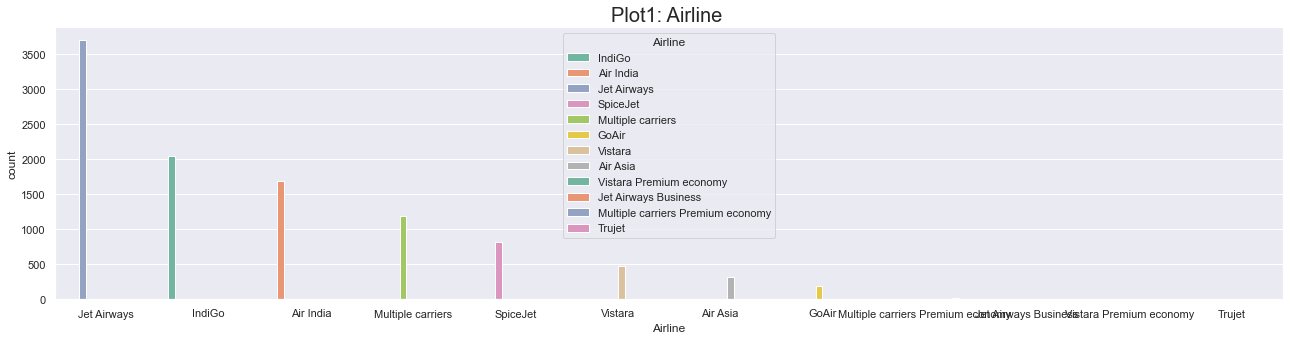

In [4855]:
#plotting each class frequency
fig = plt.figure(figsize=(22,5))
sns.set_theme(style="darkgrid")
plt.title('Plot1: Airline ', fontsize = 20)
ax = sns.countplot(x="Airline",palette="Set2", data=df1, hue = 'Airline', order = df1["Airline"].value_counts().index)
plt.show()

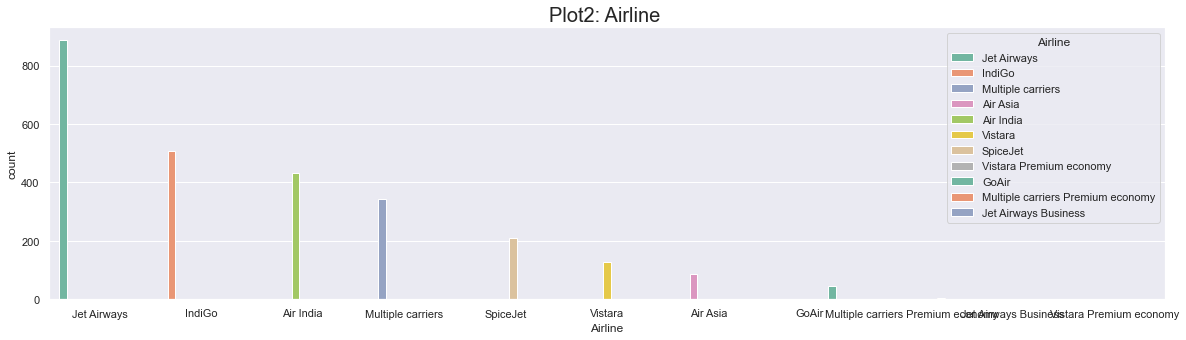

In [4856]:
#plotting each class frequency
fig = plt.figure(figsize=(20,5))
sns.set_theme(style="darkgrid")
plt.title('Plot2: Airline ', fontsize = 20)
ax = sns.countplot(x="Airline",palette="Set2", data=df2, hue = 'Airline', order = df2["Airline"].value_counts().index)
plt.show()

Text(0, 0.5, 'Price')

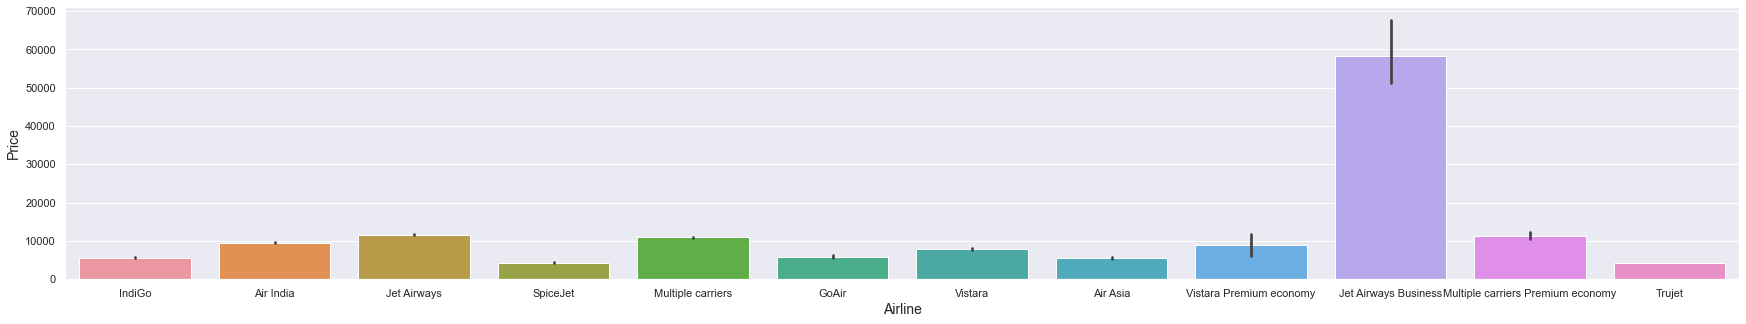

In [4857]:
#visualize this column by barplot
plt.figure(figsize=(30,5))
sns.barplot(y= 'Price',x= 'Airline', data=df1)
plt.xlabel('Airline', fontsize = 14)
plt.ylabel('Price', fontsize = 14)

Observation:
- Results by EDA
1. In plot1, The counts of jet Airways are more than others (Train dataset)
2. In Plot2, The counts of jet Airways are more than others (Test dataset)
3. In plot3, The jet airways bussiness multiple have high prioce than others

In [4858]:
#check the shape of our dataset
print('Actual shape of Train Dataset:-------->', df1.shape)
time.sleep(1)
print('Actual shape of Test Dataset:-------->', df2.shape)

Actual shape of Train Dataset:--------> (10463, 11)
Actual shape of Test Dataset:--------> (2645, 10)


In [4859]:
#Column2: Date_of_Journey

In [4860]:
df1['Date_of_Journey'].unique() #check the unique value

array(['24/03/2019', '1/05/2019', '9/06/2019', '12/05/2019', '01/03/2019',
       '24/06/2019', '12/03/2019', '27/05/2019', '1/06/2019',
       '18/04/2019', '9/05/2019', '24/04/2019', '3/03/2019', '15/04/2019',
       '12/06/2019', '6/03/2019', '21/03/2019', '3/04/2019', '6/05/2019',
       '15/05/2019', '18/06/2019', '15/06/2019', '6/04/2019',
       '18/05/2019', '27/06/2019', '21/05/2019', '06/03/2019',
       '3/06/2019', '15/03/2019', '3/05/2019', '9/03/2019', '6/06/2019',
       '24/05/2019', '09/03/2019', '1/04/2019', '21/04/2019',
       '21/06/2019', '27/03/2019', '18/03/2019', '12/04/2019',
       '9/04/2019', '1/03/2019', '03/03/2019', '27/04/2019'], dtype=object)

In [4861]:
df2['Date_of_Journey'].unique() #check the unique value

array(['6/06/2019', '12/05/2019', '21/05/2019', '24/06/2019',
       '12/06/2019', '12/03/2019', '1/05/2019', '15/03/2019',
       '18/05/2019', '21/03/2019', '15/06/2019', '15/05/2019',
       '3/06/2019', '06/03/2019', '24/03/2019', '6/03/2019', '9/05/2019',
       '18/03/2019', '6/04/2019', '1/06/2019', '3/03/2019', '27/03/2019',
       '9/06/2019', '3/05/2019', '1/04/2019', '18/06/2019', '15/04/2019',
       '6/05/2019', '9/03/2019', '3/04/2019', '27/06/2019', '21/06/2019',
       '21/04/2019', '18/04/2019', '9/04/2019', '24/05/2019',
       '01/03/2019', '09/03/2019', '27/05/2019', '03/03/2019',
       '27/04/2019', '1/03/2019', '24/04/2019', '12/04/2019'],
      dtype=object)

In [4862]:
df1['Date_of_Journey'].value_counts() #check the counts 0f unique value

6/06/2019     490
18/05/2019    486
9/06/2019     485
12/06/2019    483
21/05/2019    482
9/05/2019     466
21/03/2019    412
15/05/2019    402
27/05/2019    369
27/06/2019    339
24/06/2019    330
1/06/2019     330
3/06/2019     326
24/03/2019    314
15/06/2019    314
6/03/2019     302
27/03/2019    290
24/05/2019    286
6/05/2019     282
1/05/2019     274
12/05/2019    259
1/04/2019     256
3/03/2019     217
9/03/2019     199
15/03/2019    162
18/03/2019    156
01/03/2019    151
12/03/2019    141
9/04/2019     125
3/04/2019     110
21/06/2019    109
18/06/2019    105
09/03/2019    100
6/04/2019     100
06/03/2019     95
27/04/2019     94
03/03/2019     92
24/04/2019     92
3/05/2019      90
15/04/2019     89
21/04/2019     82
18/04/2019     67
12/04/2019     63
1/03/2019      47
Name: Date_of_Journey, dtype: int64

In [4863]:
df2['Date_of_Journey'].value_counts() #check the counts 0f unique value

9/05/2019     143
12/06/2019    132
18/05/2019    128
6/06/2019     125
9/06/2019     119
21/05/2019    116
15/05/2019    105
15/06/2019    101
6/03/2019      97
21/03/2019     93
3/06/2019      90
1/06/2019      87
24/06/2019     84
1/04/2019      77
24/03/2019     75
27/06/2019     75
6/05/2019      73
24/05/2019     71
12/05/2019     67
27/05/2019     65
27/03/2019     64
1/05/2019      62
3/03/2019      62
9/03/2019      55
12/03/2019     42
18/03/2019     41
01/03/2019     34
15/03/2019     33
06/03/2019     28
3/04/2019      28
3/05/2019      27
03/03/2019     26
9/04/2019      24
21/06/2019     24
15/04/2019     23
18/06/2019     22
21/04/2019     22
24/04/2019     21
09/03/2019     20
27/04/2019     15
6/04/2019      14
1/03/2019      12
18/04/2019     12
12/04/2019     11
Name: Date_of_Journey, dtype: int64

In [4864]:
#divide the date column into day, month, years into three columns.
df1['Date_of_Journey']=pd.to_datetime(df1['Date_of_Journey'])
df1['Day_of_Journey']=df1['Date_of_Journey'].apply(lambda x:x.day)
df1['Month_of_Journey']=df1['Date_of_Journey'].apply(lambda x:x.month)
df1['Years_of_Journey']=df1['Date_of_Journey'].apply(lambda x:x.year)
time.sleep(1) #delay of 1 sec
#divide the date column into day, month, years into three columns.
df2['Date_of_Journey']=pd.to_datetime(df2['Date_of_Journey'])
df2['Day_of_Journey']=df2['Date_of_Journey'].apply(lambda x:x.day)
df2['Month_of_Journey']=df2['Date_of_Journey'].apply(lambda x:x.month)
df2['Years_of_Journey']=df2['Date_of_Journey'].apply(lambda x:x.year)

In [4865]:
print(df1.columns) #check the train dataset columns now
time.sleep(1) #delay of 1 sec
print(df2.columns) #check the test dataset columns now

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Day_of_Journey', 'Month_of_Journey',
       'Years_of_Journey'],
      dtype='object')
Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Day_of_Journey', 'Month_of_Journey',
       'Years_of_Journey'],
      dtype='object')


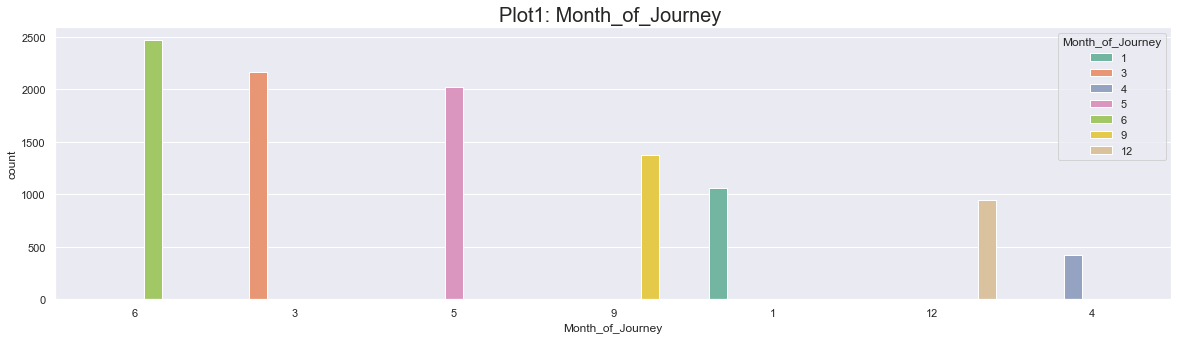

In [4866]:
#plotting each class frequency
fig = plt.figure(figsize=(20,5))
sns.set_theme(style="darkgrid")
plt.title('Plot1: Month_of_Journey ', fontsize = 20)
ax = sns.countplot(x="Month_of_Journey",palette="Set2", data=df1, hue = 'Month_of_Journey', order = df1["Month_of_Journey"].value_counts().index)
plt.show()

In [4867]:
df1['Month_of_Journey'].value_counts() #check the counts of particluar month of journey

6     2466
3     2169
5     2025
9     1375
1     1058
12     946
4      424
Name: Month_of_Journey, dtype: int64

Text(0.5, 1.0, 'Plot2:Days of journey')

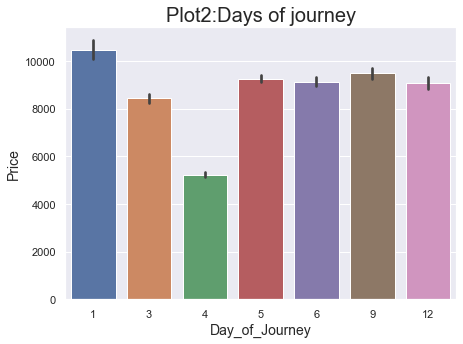

In [4868]:
#visualize this column by lineplot
plt.figure(figsize=(7,5))
sns.barplot(y= 'Price',x= 'Month_of_Journey',data=df1)
plt.xlabel('Day_of_Journey', fontsize = 14)
plt.ylabel('Price', fontsize = 14)
plt.title('Plot2:Days of journey', fontsize=20)

In [4869]:
df1['Years_of_Journey'].unique() #check the unique values

array([2019], dtype=int64)

In [4870]:
df2['Years_of_Journey'].unique()#check the unique values

array([2019], dtype=int64)

In [4871]:
df1.drop(columns='Years_of_Journey', inplace=True)#drop the column
time.sleep(1)#delay of 1 sec
df2.drop(columns='Years_of_Journey', inplace=True)#drop the column

In [4872]:
df1['Day_of_Journey'].unique() #check the unique values

array([24,  5,  6,  3, 27, 18, 15, 21,  4], dtype=int64)

In [4873]:
df2['Day_of_Journey'].unique() #check the unique values

array([ 6,  5, 21, 24,  3, 15, 18,  4, 27], dtype=int64)

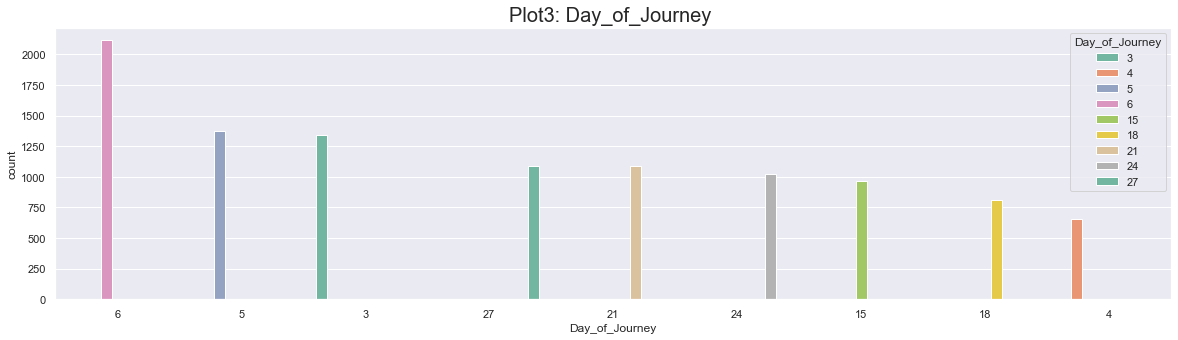

In [4874]:
#plotting each class frequency
fig = plt.figure(figsize=(20,5))
sns.set_theme(style="darkgrid")
plt.title('Plot3: Day_of_Journey ', fontsize = 20)
ax = sns.countplot(x="Day_of_Journey",palette="Set2", data=df1, hue = 'Day_of_Journey', order = df1["Day_of_Journey"].value_counts().index)
plt.show()

In [4875]:
df1['Day_of_Journey'].value_counts() #check the counts of particluar day of journey

6     2114
5     1371
3     1344
27    1092
21    1085
24    1022
15     967
18     814
4      654
Name: Day_of_Journey, dtype: int64

Text(0.5, 1.0, 'Plot4: Days of journey')

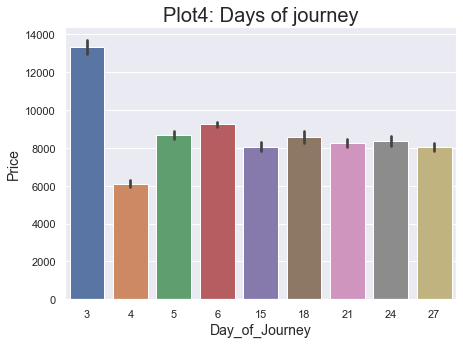

In [4876]:
#visualize this column by lineplot
plt.figure(figsize=(7,5))
sns.barplot(y= 'Price',x= 'Day_of_Journey', data=df1)
plt.xlabel('Day_of_Journey', fontsize = 14)
plt.ylabel('Price', fontsize = 14)
plt.title('Plot4: Days of journey', fontsize=20)

Observation:
- Data Cleaning
1. split the main column into three parts - Day, Month, Years
- Results By EDA
1. In plot1, Journey at 6,5,and 3 rd months are high than other months
1. In plot2, Prices are high at 3rd month of the year and low at 4th month of the year
2. In plot3, Journey of 6th day is high than other days
4. In plot4, Price is high at 1st day of the month
5. We see, year column has same values, so, we can drop this column

In [4877]:
#check the shape of our dataset
print('Actual shape of Train Dataset:-------->', df1.shape)
time.sleep(1)
print('Actual shape of Test Dataset:-------->', df2.shape)

Actual shape of Train Dataset:--------> (10463, 13)
Actual shape of Test Dataset:--------> (2645, 12)


In [4878]:
#Column3: Source

In [4879]:
df1['Source'].unique() #check the unique value

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [4880]:
df2['Source'].unique() #check the unique value

array(['Delhi', 'Kolkata', 'Banglore', 'Mumbai', 'Chennai'], dtype=object)

In [4881]:
df1['Source'].value_counts() #check the counts 0f unique value

Delhi       4346
Kolkata     2860
Banglore    2179
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [4882]:
df2['Source'].value_counts() #check the counts 0f unique value

Delhi       1127
Kolkata      707
Banglore     550
Mumbai       186
Chennai       75
Name: Source, dtype: int64

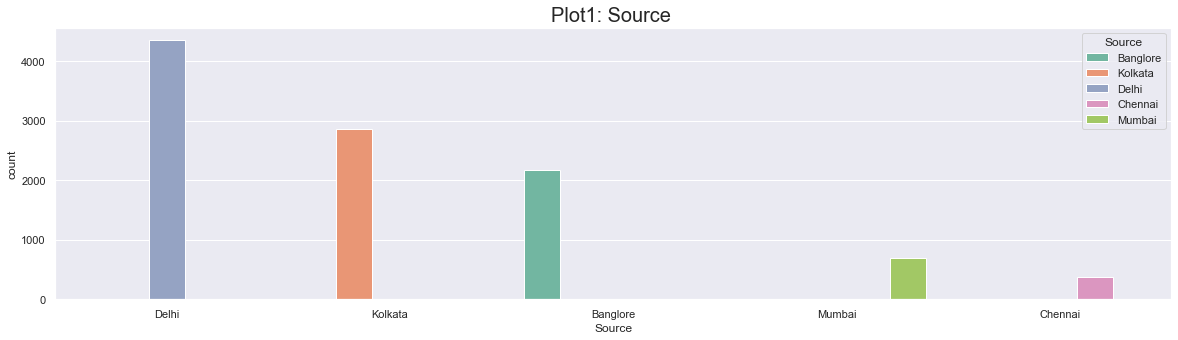

In [4883]:
#plotting each class frequency
fig = plt.figure(figsize=(20,5))
sns.set_theme(style="darkgrid")
plt.title('Plot1: Source ', fontsize = 20)
ax = sns.countplot(x="Source",palette="Set2", data=df1, hue = 'Source', order = df1["Source"].value_counts().index)
plt.show()

In [4884]:
df.groupby('Source')['Day_of_Journey'].value_counts().sort_index(ascending=True).head(50)
#Checking the relationship between Source and Day_of_Journey

Source  Day_of_Journey
0.0     1                  61
        3                 106
        4                  18
        5                  96
        6                 141
        9                  70
        12                 54
1.0     1                   6
        3                  11
        4                   2
        5                  15
        6                  20
        9                  14
        12                  7
2.0     1                 109
        3                 227
        4                  46
        5                 226
        6                 260
        9                 154
        12                 94
3.0     1                  75
        3                 151
        4                  19
        5                 116
        6                 166
        9                 103
        12                 71
4.0     1                  19
        3                  41
        4                   8
        5                  29
        6        

In [4885]:
df.groupby('Source')['Month_of_Journey'].value_counts().sort_index(ascending=True).head(50)
#Checking the relationship between Source and Month_of_Journey

Source  Month_of_Journey
0.0     3                    76
        4                    37
        5                    63
        6                   126
        15                   53
        18                   34
        21                   56
        24                   56
        27                   45
1.0     3                    13
        4                     4
        5                    12
        6                    15
        15                    7
        18                    5
        21                    5
        24                   10
        27                    4
2.0     3                   163
        4                    60
        5                   148
        6                   226
        15                  128
        18                   85
        21                  117
        24                   89
        27                  100
3.0     3                    93
        4                    41
        5                   119
        6      

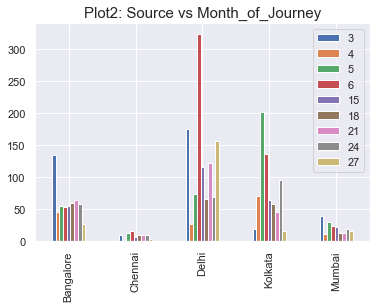

In [4886]:
#visualize by using barplot
Month_of_Journey1 = {'3': [134,9,175,19,39],
        '4': [46,0,26,71,11],'5':[54,13,74,201,30],'6':[53,16,324,136,24],'15':[55,6,115,64,22],'18':[59,9,65,58,12],'21':[64,10,122,46,13],'24':[58,9,69,96,19],'27':[27,3,157,16,16]}
df11 = pd.DataFrame(Month_of_Journey1,columns=['3','4','5','6','15','18','21','24','27'], index = ['Bangalore','Chennai','Delhi','Kolkata','Mumbai'])
df11.plot.bar()
plt.title('Plot2: Source vs Month_of_Journey', fontsize = 15)
plt.show()

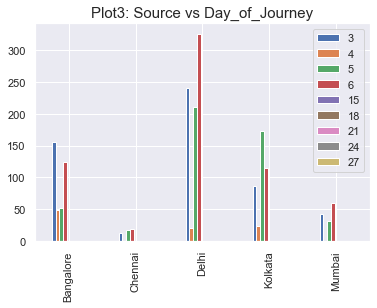

In [4887]:
#visualize by using barplot
Day_of_Journey1 = {'1': [63,7,74,104,24],
        '3': [155,13,241,87,43],'4':[49,0,20,24,0],'5':[52,17,211,173,32],'6':[125,18,326,115,59],'9':[57,6,183,99,16],'12':[49,14,72,105,12]}
df12 = pd.DataFrame(Day_of_Journey1,columns=['3','4','5','6','15','18','21','24','27'], index = ['Bangalore','Chennai','Delhi','Kolkata','Mumbai'])
df12.plot.bar()
plt.title('Plot3: Source vs Day_of_Journey', fontsize = 15)
plt.show()

Text(0.5, 1.0, 'Plot4: Source')

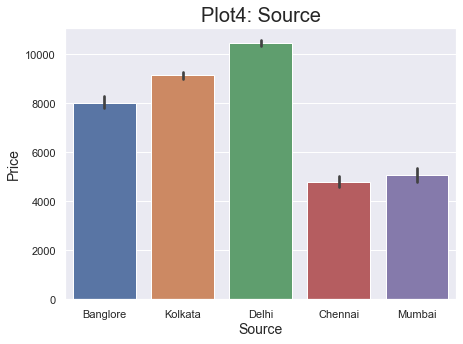

In [4888]:
#visualize this column by lineplot
plt.figure(figsize=(7,5))
sns.barplot(y= 'Price',x= 'Source', data=df1)
plt.xlabel('Source', fontsize = 14)
plt.ylabel('Price', fontsize = 14)
plt.title('Plot4: Source', fontsize=20)

Observation:
- Results by EDA
1. In plot1, Counts of Delhi is more than others
2. In plot2, Peoples are travelling from Delhi most at 6th month of the year, 5th month from kolkata,3rd month from bangalore
3. In plot3, Peoples are travelling from Delhi most at 6th day of the year, 5th day from kolkata,3rd day from bangalore
4. In plot4, Prices of delhi are higher than others

In [4889]:
#check the shape of our dataset
print('Actual shape of Train Dataset:-------->', df1.shape)
time.sleep(1)
print('Actual shape of Test Dataset:-------->', df2.shape)

Actual shape of Train Dataset:--------> (10463, 13)
Actual shape of Test Dataset:--------> (2645, 12)


In [4890]:
#Column4: Destination

In [4891]:
df1['Destination'].unique() #check the unique value

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [4892]:
df2['Destination'].unique() #check the unique value

array(['Cochin', 'Banglore', 'Delhi', 'New Delhi', 'Hyderabad', 'Kolkata'],
      dtype=object)

In [4893]:
df1['Destination'].value_counts() #check the counts 0f unique value

Cochin       4346
Banglore     2860
Delhi        1265
New Delhi     914
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [4894]:
df2['Destination'].value_counts() #check the counts 0f unique value

Cochin       1127
Banglore      707
Delhi         317
New Delhi     233
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64

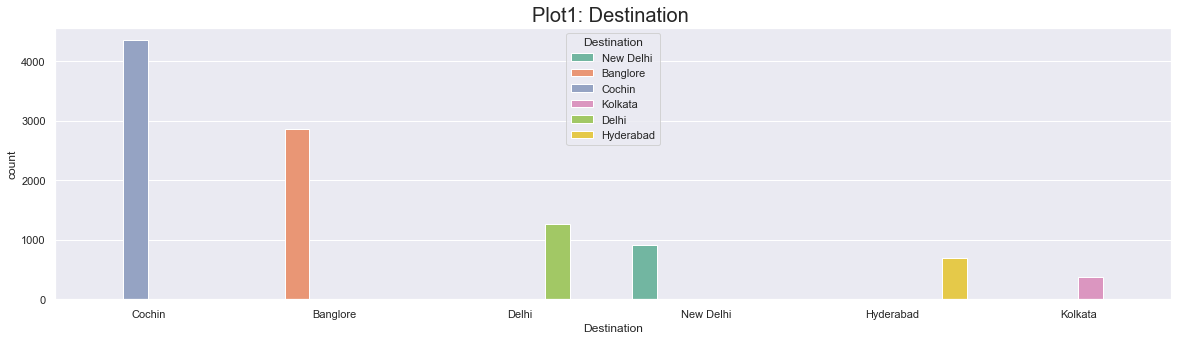

In [4895]:
#plotting each class frequency
fig = plt.figure(figsize=(20,5))
sns.set_theme(style="darkgrid")
plt.title('Plot1: Destination ', fontsize = 20)
ax = sns.countplot(x="Destination",palette="Set2", data=df1, hue = 'Destination', order = df1["Destination"].value_counts().index)
plt.show()

In [4896]:
df.groupby('Destination')['Month_of_Journey'].value_counts().sort_index(ascending=True).head(50)
#Checking the relationship between Destination and Month_of_Journey

Destination  Month_of_Journey
0.0          3                    93
             4                    41
             5                   119
             6                   145
             15                   59
             18                   62
             21                   60
             24                   78
             27                   44
1.0          3                   163
             4                    60
             5                   148
             6                   226
             15                  128
             18                   85
             21                  117
             24                   89
             27                  100
2.0          3                    34
             4                    22
             5                    32
             6                    69
             15                   35
             18                   25
             21                   35
             24                   31
        

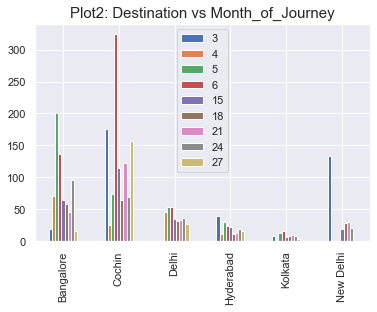

In [4897]:
#visualize by using barplot
Month_of_Journey1 = {'3': [19,175,0,39,9,134],
        '4': [71,26,46,11,0,0],'5':[201,74,54,30,13,0],'6':[136,324,53,24,16,0],'15':[64,115,35,22,6,20],'18':[58,65,31,12,9,28],'21':[46,122,34,13,10,30],'24':[96,69,37,19,9,21],'27':[16,157,27,16,3,0]}
df11 = pd.DataFrame(Month_of_Journey1,columns=['3','4','5','6','15','18','21','24','27'], index = ['Bangalore','Cochin','Delhi','Hyderabad','Kolkata','New Delhi'])
df11.plot.bar()
plt.title('Plot2: Destination vs Month_of_Journey', fontsize = 15)
plt.show()

In [4898]:
df.groupby('Destination')['Day_of_Journey'].value_counts().sort_index(ascending=True).head(50)
#Checking the relationship between Destination and Day_of_Journey

Destination  Day_of_Journey
0.0          1                  75
             3                 151
             4                  19
             5                 116
             6                 166
             9                 103
             12                 71
1.0          1                 109
             3                 227
             4                  46
             5                 226
             6                 260
             9                 154
             12                 94
2.0          1                  34
             3                  57
             4                  12
             5                  64
             6                  81
             9                  37
             12                 28
3.0          1                  19
             3                  41
             4                   8
             5                  29
             6                  44
             9                  19
             12            

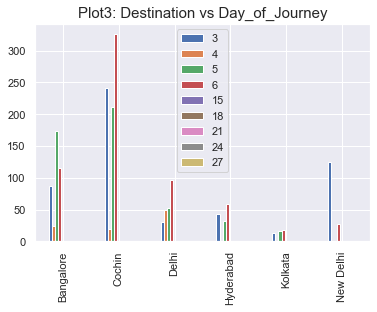

In [4899]:
#visualize by using barplot
Day_of_Journey1 = {'1': [104,74,29,24,7,34],
        '3': [87,241,30,43,13,125],'4':[24,20,49,0,0,0],'5':[173,211,52,32,17,0],'6':[115,326,97,59,18,28],'9':[99,183,37,16,6,20],'12':[105,72,23,12,14,26]}
df12 = pd.DataFrame(Day_of_Journey1,columns=['3','4','5','6','15','18','21','24','27'], index = ['Bangalore','Cochin','Delhi','Hyderabad','Kolkata','New Delhi'])
df12.plot.bar()
plt.title('Plot3: Destination vs Day_of_Journey', fontsize = 15)
plt.show()

Text(0.5, 1.0, 'Plot4: Destination')

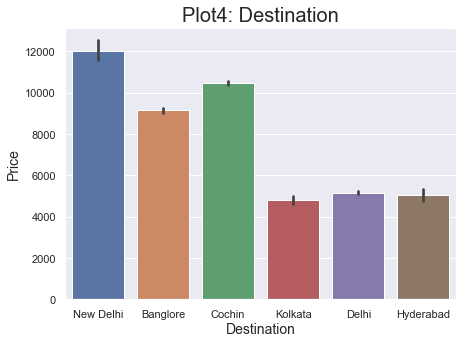

In [4900]:
#visualize this column by lineplot
plt.figure(figsize=(7,5))
sns.barplot(y= 'Price',x= 'Destination', data=df1)
plt.xlabel('Destination', fontsize = 14)
plt.ylabel('Price', fontsize = 14)
plt.title('Plot4: Destination', fontsize=20)

Observation:
- Results by EDA
1. In plot1, Counts of Cochin is more than others
2. In plot2, Peoples are travelling to cochin most at 3rd and 6th month of the year, 5th month from kolkata
3. In plot3, Peoples are travelling to cochin most at 3rd,5th and 6th day of the year
4. In plot4, Prices of delhi are higher than others

In [4901]:
#check the shape of our dataset
print('Actual shape of Train Dataset:-------->', df1.shape)
time.sleep(1)
print('Actual shape of Test Dataset:-------->', df2.shape)
time.sleep(1)
print('Actual shape of Sample Dataset:-------->', df3.shape)

Actual shape of Train Dataset:--------> (10463, 13)
Actual shape of Test Dataset:--------> (2645, 12)
Actual shape of Sample Dataset:--------> (2462, 1)


In [4902]:
#Column5: Route

In [4903]:
df1['Route'].unique() #check the unique value

array(['BLR → DEL', 'CCU → IXR → BBI → BLR', 'DEL → LKO → BOM → COK',
       'CCU → NAG → BLR', 'BLR → NAG → DEL', 'CCU → BLR',
       'BLR → BOM → DEL', 'DEL → BOM → COK', 'DEL → BLR → COK',
       'MAA → CCU', 'CCU → BOM → BLR', 'DEL → AMD → BOM → COK',
       'DEL → PNQ → COK', 'DEL → CCU → BOM → COK', 'BLR → COK → DEL',
       'DEL → IDR → BOM → COK', 'DEL → LKO → COK',
       'CCU → GAU → DEL → BLR', 'DEL → NAG → BOM → COK',
       'CCU → MAA → BLR', 'DEL → HYD → COK', 'CCU → HYD → BLR',
       'DEL → COK', 'CCU → DEL → BLR', 'BLR → BOM → AMD → DEL',
       'BOM → DEL → HYD', 'DEL → MAA → COK', 'BOM → HYD',
       'DEL → BHO → BOM → COK', 'DEL → JAI → BOM → COK',
       'DEL → ATQ → BOM → COK', 'DEL → JDH → BOM → COK',
       'CCU → BBI → BOM → BLR', 'BLR → MAA → DEL',
       'DEL → GOI → BOM → COK', 'DEL → BDQ → BOM → COK',
       'CCU → JAI → BOM → BLR', 'CCU → BBI → BLR', 'BLR → HYD → DEL',
       'DEL → TRV → COK', 'CCU → IXR → DEL → BLR',
       'DEL → IXU → BOM → COK', 'CCU 

In [4904]:
df2['Route'].unique() #check the unique value

array(['DEL → BOM → COK', 'CCU → MAA → BLR', 'BLR → DEL',
       'BLR → TRV → DEL', 'CCU → HYD → BLR', 'CCU → BLR',
       'CCU → BOM → BLR', 'DEL → MAA → BOM → COK', 'DEL → HYD → COK',
       'BLR → BOM → DEL', 'CCU → DEL → BLR', 'DEL → JAI → BOM → COK',
       'DEL → BHO → BOM → COK', 'BOM → HYD', 'CCU → PNQ → BLR',
       'MAA → CCU', 'CCU → BOM → COK → BLR', 'DEL → BLR → COK',
       'DEL → HYD → MAA → COK', 'DEL → MAA → COK',
       'CCU → IXR → BBI → BOM → BLR', 'CCU → DEL → AMD → BLR',
       'DEL → COK', 'CCU → JAI → BOM → BLR', 'DEL → LKO → COK',
       'CCU → IXB → BLR', 'DEL → CCU → BOM → COK',
       'CCU → GAU → DEL → BLR', 'BLR → COK → DEL',
       'BLR → BOM → NAG → DEL', 'CCU → BBI → BOM → BLR',
       'BLR → AMD → DEL', 'BOM → DEL → HYD', 'DEL → GOI → BOM → COK',
       'DEL → IXU → BOM → COK', 'DEL → HYD → BOM → COK',
       'CCU → DEL → COK → BLR', 'BLR → GOI → DEL',
       'BLR → BOM → BHO → DEL', 'DEL → IDR → BOM → COK',
       'DEL → AMD → BOM → COK', 'DEL → RPR →

In [4905]:
df1['Route'].value_counts() #check the counts 0f unique value

DEL → BOM → COK          2376
BLR → DEL                1536
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
BOM → BBI → HYD             1
BOM → DED → DEL → HYD       1
BOM → CCU → HYD             1
CCU → IXB → DEL → BLR       1
BOM → UDR → DEL → HYD       1
Name: Route, Length: 128, dtype: int64

In [4906]:
df2['Route'].value_counts() #check the counts 0f unique value

DEL → BOM → COK          620
BLR → DEL                386
CCU → BOM → BLR          253
CCU → BLR                172
BOM → HYD                164
                        ... 
CCU → AMD → BLR            1
BLR → BOM → UDR → DEL      1
BLR → BDQ → DEL            1
BLR → VGA → DEL            1
BLR → VGA → HYD → DEL      1
Name: Route, Length: 100, dtype: int64

In [4907]:
df1.drop(columns='Route',inplace=True) #drop the column

In [4908]:
df2.drop(columns='Route',inplace=True)#drop the column

In [4909]:
#check the shape of our dataset
print('Actual shape of Train Dataset:-------->', df1.shape)
time.sleep(1)
print('Actual shape of Test Dataset:-------->', df2.shape)

Actual shape of Train Dataset:--------> (10463, 12)
Actual shape of Test Dataset:--------> (2645, 11)


In [4910]:
#Column6: Dep_Time

In [4911]:
df1['Dep_Time'].unique() #check the unique value

array(['22:20', '05:50', '09:25', '18:05', '16:50', '09:00', '18:55',
       '08:00', '08:55', '11:25', '09:45', '20:20', '11:40', '21:10',
       '17:15', '16:40', '08:45', '14:00', '20:15', '16:00', '14:10',
       '22:00', '04:00', '21:25', '21:50', '07:00', '07:05', '09:50',
       '14:35', '10:35', '15:05', '14:15', '06:45', '20:55', '11:10',
       '05:45', '19:00', '23:05', '11:00', '09:35', '21:15', '23:55',
       '19:45', '08:50', '15:40', '06:05', '15:00', '13:55', '05:55',
       '13:20', '05:05', '06:25', '17:30', '08:20', '19:55', '06:30',
       '14:05', '02:00', '09:40', '08:25', '20:25', '13:15', '02:15',
       '16:55', '20:45', '05:15', '19:50', '20:00', '06:10', '19:30',
       '04:45', '12:55', '18:15', '17:20', '15:25', '23:00', '12:00',
       '14:45', '11:50', '11:30', '14:40', '19:10', '06:00', '23:30',
       '07:35', '13:05', '12:30', '15:10', '12:50', '18:25', '16:30',
       '00:40', '06:50', '13:00', '19:15', '01:30', '17:00', '10:00',
       '19:35', '15:

In [4912]:
df2['Dep_Time'].unique() #check the unique value

array(['17:30', '06:20', '19:15', '08:00', '23:55', '18:15', '07:30',
       '15:15', '10:10', '16:30', '13:55', '06:50', '09:00', '05:45',
       '21:25', '13:15', '09:55', '22:55', '10:45', '20:00', '05:30',
       '21:05', '16:00', '14:00', '22:50', '19:50', '07:10', '05:55',
       '16:55', '18:55', '10:20', '17:10', '13:00', '22:45', '21:00',
       '17:45', '09:25', '14:05', '09:45', '02:00', '11:40', '17:00',
       '06:00', '07:05', '16:45', '19:40', '03:50', '21:15', '11:30',
       '12:00', '21:50', '05:50', '07:55', '09:10', '08:20', '09:30',
       '10:00', '14:55', '22:10', '07:00', '19:55', '19:30', '15:00',
       '05:35', '06:40', '17:15', '21:20', '07:35', '06:55', '17:35',
       '11:15', '20:15', '20:25', '05:40', '15:05', '20:55', '14:25',
       '19:45', '08:25', '22:00', '21:10', '02:15', '08:30', '20:40',
       '14:15', '14:35', '11:10', '19:35', '15:20', '06:10', '22:20',
       '08:35', '14:40', '09:40', '01:30', '08:50', '19:05', '08:55',
       '11:35', '04:

In [4913]:
df1['Dep_Time'].value_counts() #check the counts 0f unique value

18:55    233
17:00    227
07:05    202
07:10    201
10:00    196
        ... 
04:50      1
12:05      1
21:35      1
22:25      1
03:00      1
Name: Dep_Time, Length: 222, dtype: int64

In [4914]:
df2['Dep_Time'].value_counts() #check the counts 0f unique value

10:00    61
18:55    54
20:00    52
14:05    51
17:00    48
         ..
15:35     1
02:30     1
06:15     1
04:50     1
01:35     1
Name: Dep_Time, Length: 199, dtype: int64

In [4915]:
df1.groupby('Dep_Time')['Day_of_Journey'].value_counts().sort_index(ascending=True).head(50)
#Checking the relationship between Dep_Time and Day_of_Journey

Dep_Time  Day_of_Journey
00:20     3                  6
00:25     6                  4
          18                 1
          21                 1
          27                 1
00:30     3                  5
          4                  2
          5                  4
          6                  1
          15                 2
          18                 2
          21                 2
          24                 1
          27                 2
00:40     3                  3
          21                 1
          24                 2
01:30     3                  4
          4                  4
          5                  5
          6                  4
          15                 3
          18                 3
          21                 2
          24                 5
          27                 3
01:35     3                  1
01:40     6                  2
          24                 1
02:00     3                  3
          4                  3
          5   

Text(0.5, 1.0, 'Plot1: Dep_Time vs Day_of_Journey')

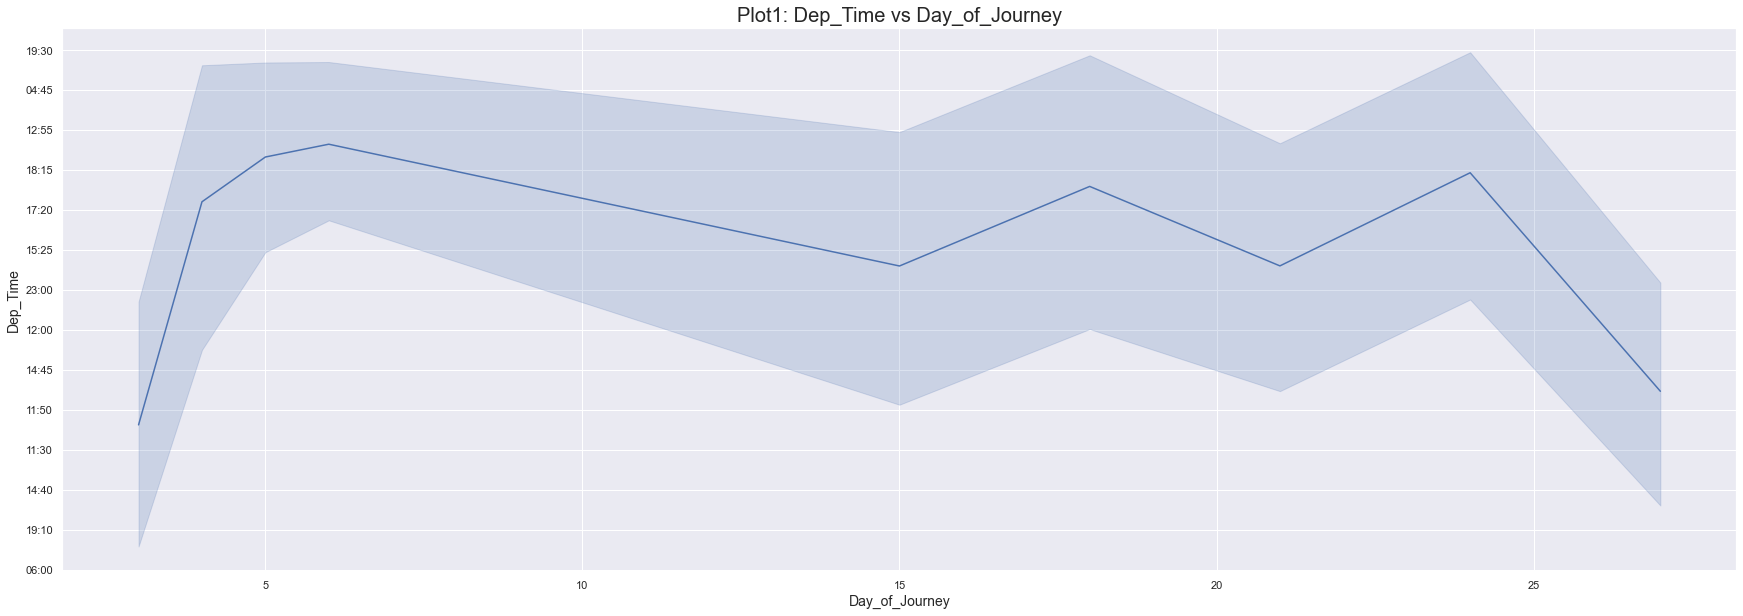

In [4916]:
#visualize this column by lineplot
plt.figure(figsize=(30,10))
sns.lineplot(x= 'Day_of_Journey',y= 'Dep_Time', data=df1)
plt.ylabel('Dep_Time', fontsize = 14)
plt.xlabel('Day_of_Journey', fontsize = 14)
plt.title('Plot1: Dep_Time vs Day_of_Journey', fontsize=20)

In [4917]:
df1.groupby('Dep_Time')['Month_of_Journey'].value_counts().sort_index(ascending=True).head(50)
#Checking the relationship between Dep_Time and Month_of_Journey

Dep_Time  Month_of_Journey
00:20     1                    2
          9                    4
00:25     1                    1
          3                    1
          6                    4
          9                    1
00:30     1                    4
          3                    5
          4                    5
          5                    3
          6                    1
          12                   3
00:40     3                    5
          9                    1
01:30     1                    3
          3                    9
          4                    4
          5                    4
          6                    6
          9                    5
          12                   2
01:35     12                   1
01:40     3                    1
          6                    1
          12                   1
02:00     1                    3
          3                    7
          4                    6
          5                    5
          6     

Text(0.5, 1.0, 'Plot2: Dep_Time vs Month of journey')

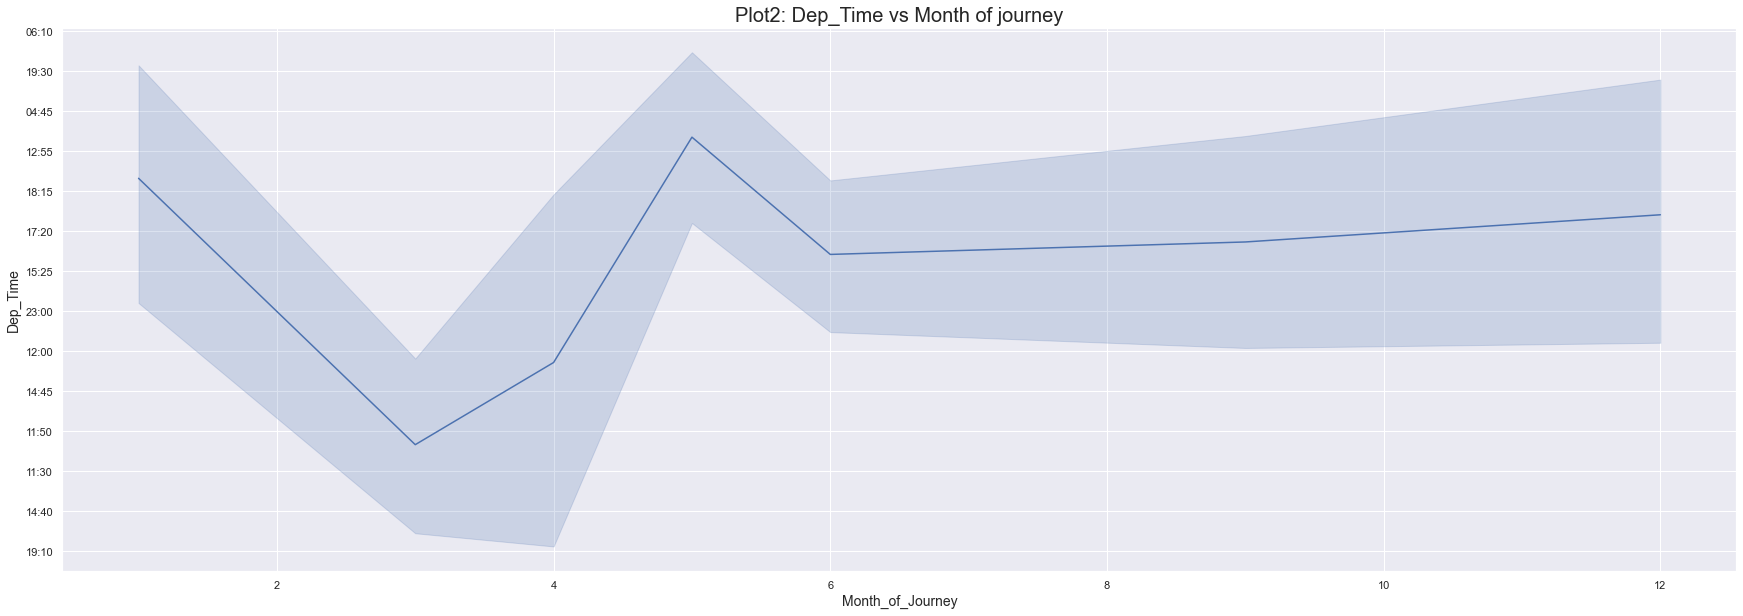

In [4918]:
#visualize this column by lineplot
plt.figure(figsize=(30,10))
sns.lineplot(x= 'Month_of_Journey',y= 'Dep_Time', data=df1)
plt.ylabel('Dep_Time', fontsize = 14)
plt.xlabel('Month_of_Journey', fontsize = 14)
plt.title('Plot2: Dep_Time vs Month of journey', fontsize=20)

In [4919]:
df1.groupby('Dep_Time')['Price'].value_counts().sort_index(ascending=True).head(100)
#Checking the relationship between Dep_Time and Price

Dep_Time  Price
00:20     11848    1
          13977    1
          15029    1
          18260    1
          23170    1
                  ..
02:15     18371    5
02:30     2754     2
          3175     1
          3342     1
          3603     1
Name: Price, Length: 100, dtype: int64

Observation:
- Results by EDA
1. We can see,In the value counts, evening and morning flights are more
2. In plot1, We can see, Travelling on evening is almost constant for all the days of the month but at the early days of the month, people's are travelling at late morning and at afternoon also.
3. In plot2, We can see, on 3rd day of the month, alomost flights are running at afternoon time
4. We can see by relationship between price and dep_time, the price of flights are more at late night

In [4920]:
#check the shape of our dataset
print('Actual shape of Train Dataset:-------->', df1.shape)
time.sleep(1)
print('Actual shape of Test Dataset:-------->', df2.shape)

Actual shape of Train Dataset:--------> (10463, 12)
Actual shape of Test Dataset:--------> (2645, 11)


In [4921]:
#Column7: Arrival_Time

In [4922]:
df1['Arrival_Time'].unique() #check the unique value

array(['01:10 22 Mar', '13:15', '04:25 10 Jun', ..., '06:50 10 Mar',
       '00:05 19 Mar', '21:20 13 Mar'], dtype=object)

In [4923]:
df2['Arrival_Time'].unique() #check the unique value

array(['04:25 07 Jun', '10:20', '19:00 22 May', '21:00', '02:45 25 Jun',
       '12:35 13 Jun', '22:35', '20:30', '12:55', '18:50 22 Mar', '16:10',
       '19:15', '10:25', '12:35 04 Jun', '08:15 07 Mar', '22:30', '22:10',
       '04:25 13 Jun', '08:15 13 Mar', '01:35 07 Mar', '10:05 10 May',
       '09:00 16 Mar', '19:00', '23:55', '04:25 22 Mar', '17:45',
       '01:20 04 Mar', '01:35 28 Mar', '12:35', '22:50', '08:35', '23:00',
       '12:00 10 May', '19:40', '01:30 16 May', '00:15 10 Jun',
       '07:40 16 Jun', '02:15 02 May', '20:05', '18:50 04 Mar', '15:25',
       '22:35 02 Apr', '13:45 13 May', '19:50', '16:20 25 Mar', '11:25',
       '12:00', '18:10', '07:45', '19:10', '12:10', '18:50 07 May',
       '09:25 10 Mar', '22:25', '22:20', '15:50', '07:25', '00:15 13 Jun',
       '18:50', '13:30', '19:00 19 May', '21:50', '15:45', '10:40',
       '11:20', '12:20', '05:25 02 May', '17:50', '10:05 19 May',
       '01:00 25 Jun', '09:05 10 Jun', '01:30 10 May', '10:35',
       '08:15 

In [4924]:
df1['Arrival_Time'].value_counts() #check the counts 0f unique value

19:00           412
21:00           360
19:15           333
16:10           154
12:35           122
               ... 
01:20 22 Apr      1
00:40 10 May      1
07:45 07 Jun      1
23:25 25 May      1
03:35 10 Jun      1
Name: Arrival_Time, Length: 1343, dtype: int64

In [4925]:
df2['Arrival_Time'].value_counts() #check the counts 0f unique value

19:00           112
21:00           105
19:15            99
12:35            37
16:10            31
               ... 
22:35 25 Mar      1
07:45 02 Apr      1
02:45 10 May      1
10:50 07 Mar      1
19:10 13 Mar      1
Name: Arrival_Time, Length: 704, dtype: int64

In [4926]:
df1['Arrival_Time'] = df1['Arrival_Time'].str.split(" ").str[0]
#cleaning the column

In [4927]:
df2['Arrival_Time'] = df2['Arrival_Time'].str.split(" ").str[0]
#cleaning the column

In [4928]:
df1['Arrival_Time'].unique() #check the unique values

array(['01:10', '13:15', '04:25', '23:30', '21:35', '11:25', '10:25',
       '05:05', '19:15', '23:00', '22:55', '13:55', '09:20', '19:50',
       '12:35', '19:20', '13:20', '06:50', '21:50', '08:15', '03:35',
       '12:55', '23:15', '21:00', '20:20', '16:45', '19:00', '18:10',
       '15:15', '08:35', '11:05', '14:15', '10:55', '00:15', '02:45',
       '12:00', '23:55', '01:30', '09:25', '15:25', '15:35', '08:30',
       '10:05', '14:30', '07:55', '10:35', '22:35', '04:40', '07:25',
       '20:45', '14:25', '22:30', '23:20', '07:40', '22:50', '14:35',
       '08:55', '18:50', '09:05', '01:35', '09:40', '16:25', '11:10',
       '17:05', '17:50', '23:10', '08:45', '07:45', '16:10', '00:55',
       '23:35', '20:00', '00:40', '21:45', '18:15', '03:25', '04:15',
       '21:10', '21:05', '09:45', '18:05', '22:00', '15:30', '08:50',
       '08:00', '19:35', '11:20', '10:15', '12:45', '02:20', '07:15',
       '11:50', '18:30', '19:45', '21:20', '20:05', '09:10', '22:20',
       '10:10', '01:

In [4929]:
df2['Arrival_Time'].unique() #check the unique values

array(['04:25', '10:20', '19:00', '21:00', '02:45', '12:35', '22:35',
       '20:30', '12:55', '18:50', '16:10', '19:15', '10:25', '08:15',
       '22:30', '22:10', '01:35', '10:05', '09:00', '23:55', '17:45',
       '01:20', '22:50', '08:35', '23:00', '12:00', '19:40', '01:30',
       '00:15', '07:40', '02:15', '20:05', '15:25', '13:45', '19:50',
       '16:20', '11:25', '18:10', '07:45', '19:10', '12:10', '09:25',
       '22:25', '22:20', '15:50', '07:25', '13:30', '21:50', '15:45',
       '10:40', '11:20', '12:20', '05:25', '17:50', '01:00', '09:05',
       '10:35', '18:15', '20:45', '07:05', '18:30', '10:10', '19:45',
       '00:45', '21:20', '09:30', '22:15', '18:25', '20:25', '14:05',
       '08:45', '20:20', '16:55', '19:35', '03:35', '12:45', '10:50',
       '11:30', '16:45', '04:40', '00:05', '19:55', '21:05', '15:30',
       '17:55', '08:55', '00:40', '17:15', '17:05', '04:15', '20:35',
       '21:55', '10:55', '14:45', '14:00', '11:10', '07:55', '10:45',
       '17:10', '16:

In [4930]:
df1['Arrival_Time'].value_counts() #check the counts of unique values

19:00    590
19:15    533
04:25    512
12:35    408
21:00    360
        ... 
13:10      1
15:10      1
14:40      1
16:40      1
03:40      1
Name: Arrival_Time, Length: 223, dtype: int64

In [4931]:
df2['Arrival_Time'].value_counts() #check the counts of unique values

19:00    160
19:15    154
04:25    122
21:00    105
01:30     96
        ... 
03:15      1
16:35      1
12:40      1
11:55      1
16:05      1
Name: Arrival_Time, Length: 204, dtype: int64

Text(0.5, 1.0, 'Plot1: Arrival_Time vs Day_of_Journey')

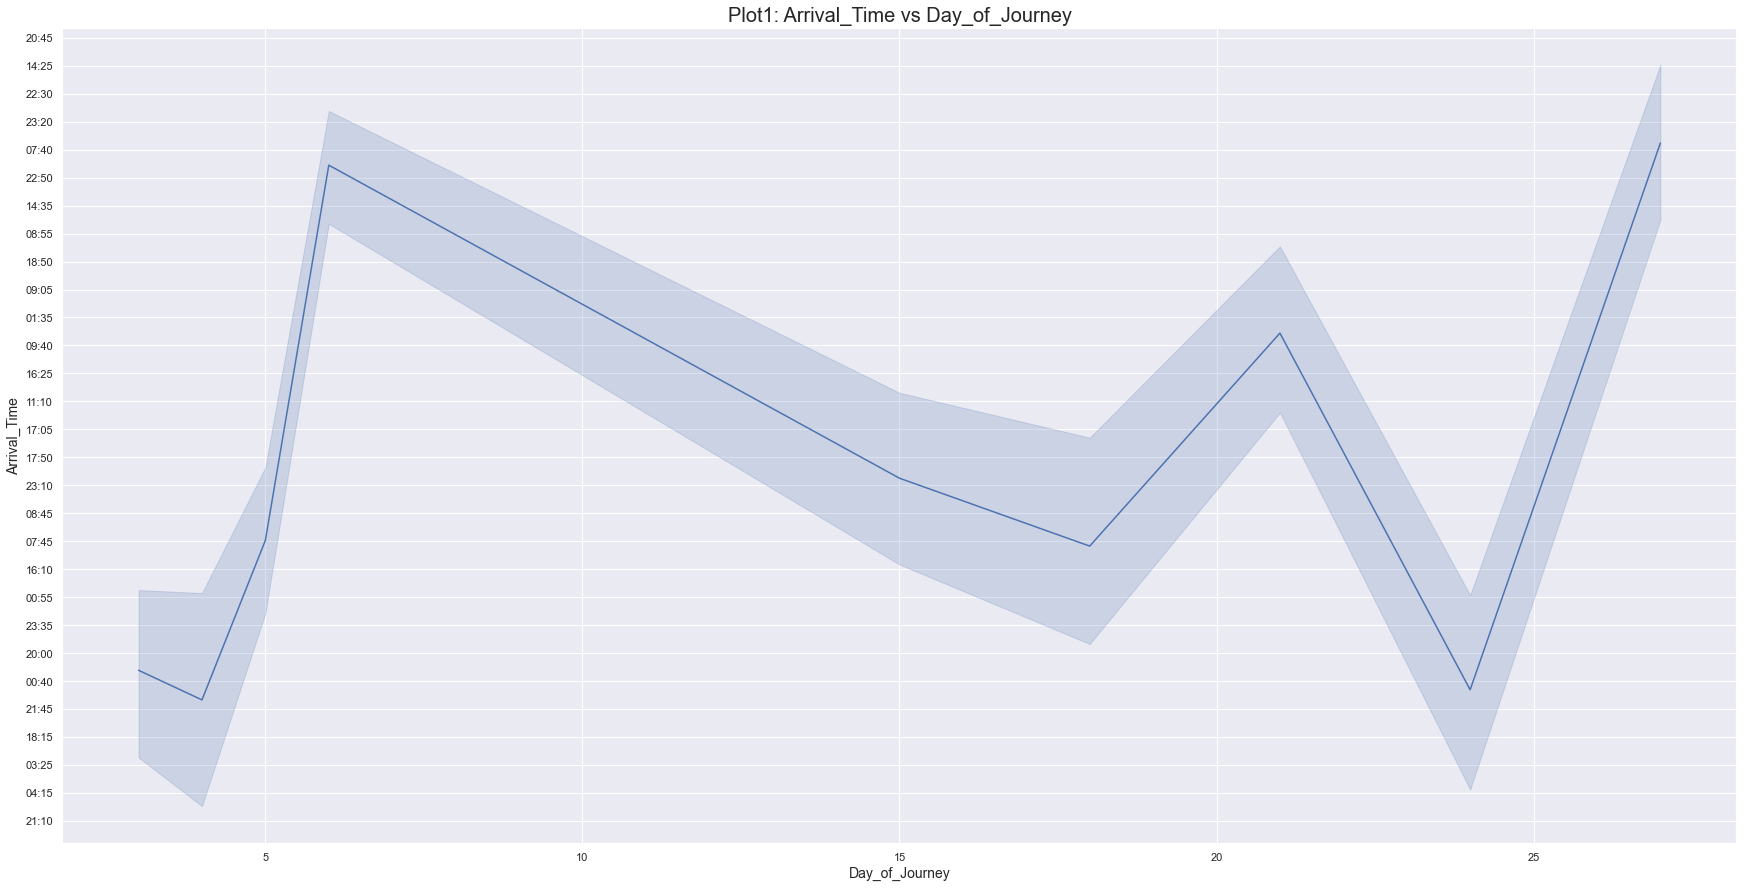

In [4932]:
#visualize this column by lineplot
plt.figure(figsize=(30,15))
sns.lineplot(x= 'Day_of_Journey',y= 'Arrival_Time', data=df1)
plt.ylabel('Arrival_Time', fontsize = 14)
plt.xlabel('Day_of_Journey', fontsize = 14)
plt.title('Plot1: Arrival_Time vs Day_of_Journey', fontsize=20)

Text(0.5, 1.0, 'Plot2: Arrival_Time vs Month of journey')

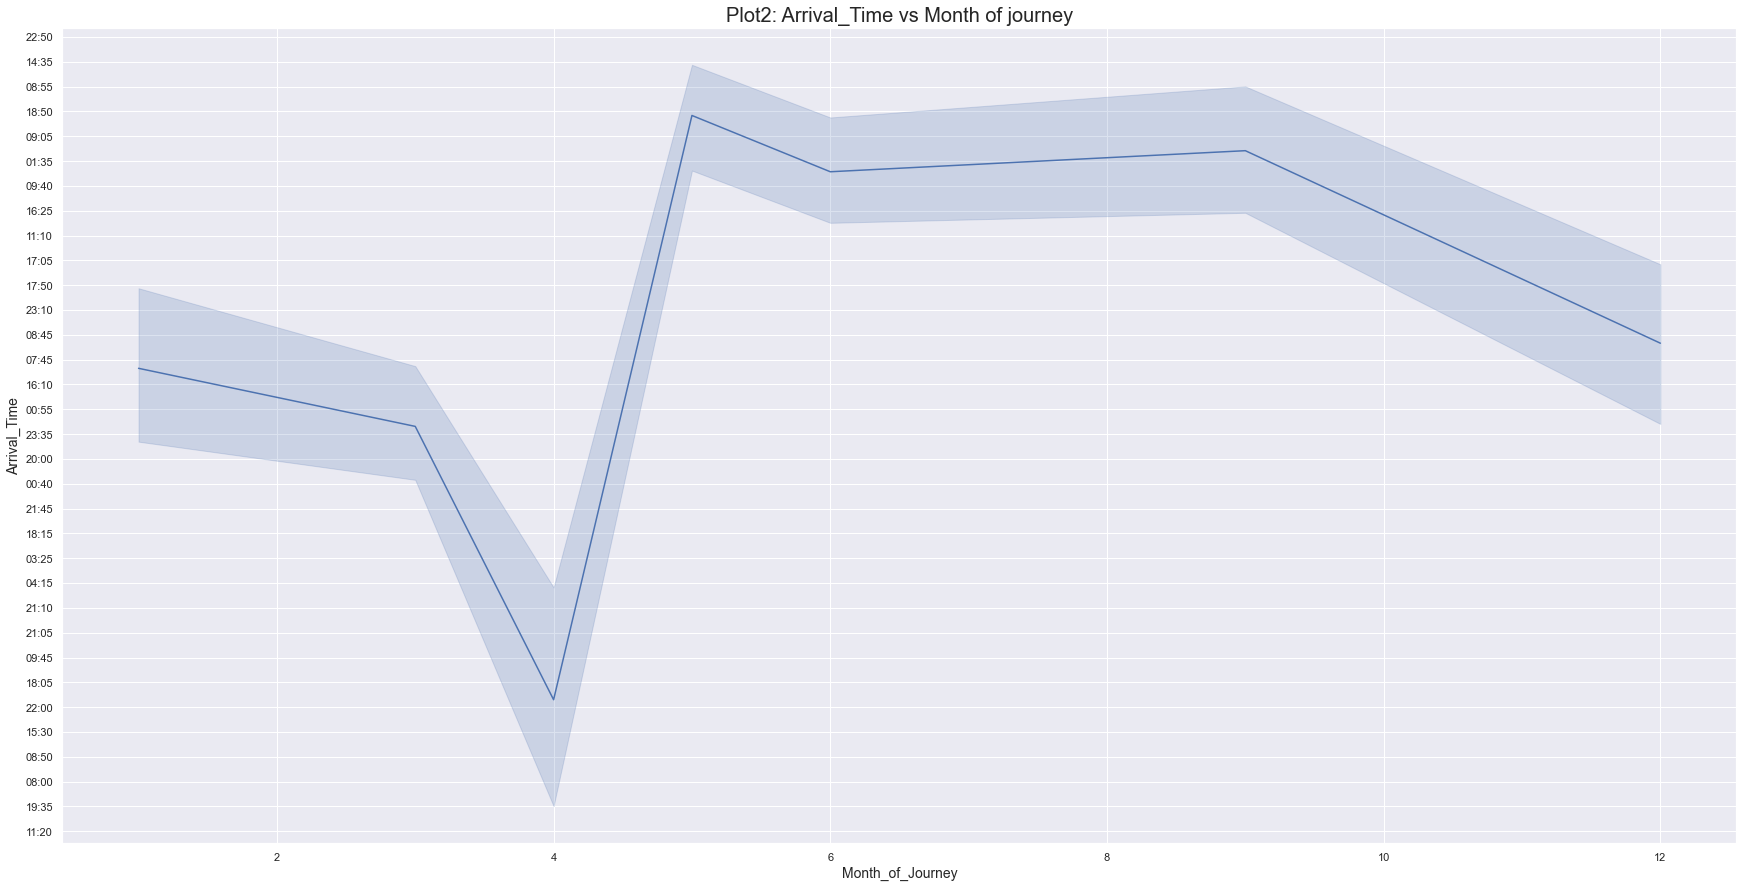

In [4933]:
#visualize this column by lineplot
plt.figure(figsize=(30,15))
sns.lineplot(x= 'Month_of_Journey',y= 'Arrival_Time', data=df1)
plt.ylabel('Arrival_Time', fontsize = 14)
plt.xlabel('Month_of_Journey', fontsize = 14)
plt.title('Plot2: Arrival_Time vs Month of journey', fontsize=20)

Observation:
- Results by EDA
1. We can see,In the value counts, evening and morning flights are more
2. In plot1, We can see, evening arrival flights are more at mid month
2. and late night flights are very less at early days of the month
3. In plot2, We can see, evening flights are more at the mid month

In [4934]:
#check the shape of our dataset
print('Actual shape of Train Dataset:-------->', df1.shape)
time.sleep(1)
print('Actual shape of Test Dataset:-------->', df2.shape)

Actual shape of Train Dataset:--------> (10463, 12)
Actual shape of Test Dataset:--------> (2645, 11)


In [4935]:
#Column8: Duration

In [4936]:
df1['Duration'].unique() #check the unique value

array(['2h 50m', '7h 25m', '19h', '5h 25m', '4h 45m', '2h 25m', '15h 30m',
       '21h 5m', '25h 30m', '7h 50m', '13h 15m', '2h 35m', '2h 15m',
       '12h 10m', '26h 35m', '4h 30m', '22h 35m', '23h', '20h 35m',
       '5h 10m', '15h 20m', '2h 55m', '13h 20m', '15h 10m', '5h 45m',
       '5h 55m', '13h 25m', '22h', '5h 30m', '10h 25m', '5h 15m',
       '2h 30m', '6h 15m', '11h 55m', '11h 5m', '8h 30m', '22h 5m',
       '2h 45m', '12h', '16h 5m', '19h 55m', '3h 15m', '25h 20m', '3h',
       '16h 15m', '15h 5m', '6h 30m', '25h 5m', '12h 25m', '27h 20m',
       '10h 15m', '10h 30m', '1h 30m', '1h 25m', '26h 30m', '7h 20m',
       '13h 30m', '5h', '19h 5m', '14h 50m', '2h 40m', '22h 10m',
       '9h 35m', '10h', '21h 20m', '18h 45m', '12h 20m', '18h', '9h 15m',
       '17h 30m', '16h 35m', '12h 15m', '7h 30m', '24h', '8h 55m',
       '7h 10m', '14h 30m', '30h 20m', '15h', '12h 45m', '10h 10m',
       '15h 25m', '14h 5m', '20h 15m', '23h 10m', '18h 10m', '16h',
       '2h 20m', '8h', '16h 5

In [4937]:
df2['Duration'].unique() #check the unique value

array(['10h 55m', '4h', '23h 45m', '13h', '2h 50m', '18h 20m', '15h 5m',
       '5h 15m', '2h 45m', '6h 5m', '28h 55m', '9h 20m', '10h 15m',
       '4h 40m', '17h 20m', '10h 50m', '9h 15m', '12h 15m', '9h 10m',
       '14h 50m', '14h 5m', '11h 35m', '13h 30m', '12h 25m', '2h 30m',
       '25h 30m', '19h 25m', '7h', '11h 40m', '7h 5m', '3h', '1h 25m',
       '2h 40m', '17h 5m', '10h 40m', '12h 30m', '1h 30m', '23h 40m',
       '2h 20m', '23h 35m', '27h 40m', '28h 20m', '5h 45m', '26h 25m',
       '5h 40m', '2h 15m', '2h 55m', '7h 30m', '5h 20m', '25h 50m',
       '13h 15m', '26h 20m', '5h 25m', '8h 45m', '7h 20m', '21h 10m',
       '16h', '7h 50m', '16h 5m', '5h 55m', '13h 50m', '11h 55m',
       '13h 20m', '18h 10m', '28h 10m', '5h', '23h 15m', '1h 15m',
       '1h 20m', '13h 25m', '6h 15m', '10h 10m', '4h 35m', '11h',
       '12h 20m', '15h 10m', '19h', '13h 45m', '9h 50m', '2h 35m',
       '7h 15m', '23h', '10h 25m', '5h 5m', '22h 45m', '8h 40m',
       '11h 30m', '15h 40m', '7h 55m'

In [4938]:
df1['Duration'].value_counts() #check the counts 0f unique value

2h 50m     544
1h 30m     386
2h 45m     335
2h 55m     332
2h 35m     329
          ... 
39h 5m       1
19h 50m      1
33h 20m      1
40h 20m      1
13h 35m      1
Name: Duration, Length: 368, dtype: int64

In [4939]:
df2['Duration'].value_counts() #check the counts 0f unique value

2h 50m     121
1h 30m     107
2h 45m      95
2h 55m      79
3h          72
          ... 
3h 45m       1
4h 20m       1
30h          1
29h 40m      1
17h 30m      1
Name: Duration, Length: 320, dtype: int64

In [4940]:
df1.groupby('Duration')['Price'].value_counts().sort_index(ascending=True)
#Checking the relationship between Duration and Price

Duration  Price
10h       6878     1
          7791     1
          8099     5
          8309     1
          9149     1
                  ..
9h 5m     9646     8
          9736     1
          9856     2
          10493    1
          10696    1
Name: Price, Length: 4938, dtype: int64

Observation:
- Results by EDA
1. less duration flights have high prices

In [4941]:
#check the shape of our dataset
print('Actual shape of Train Dataset:-------->', df1.shape)
time.sleep(1)
print('Actual shape of Test Dataset:-------->', df2.shape)

Actual shape of Train Dataset:--------> (10463, 12)
Actual shape of Test Dataset:--------> (2645, 11)


In [4942]:
#Column9: Total_Stops

In [4943]:
df1['Total_Stops'].unique() #check the unique value

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [4944]:
df2['Total_Stops'].unique() #check the unique value

array(['1 stop', 'non-stop', '2 stops', '3 stops', '4 stops'],
      dtype=object)

In [4945]:
df1['Total_Stops'].isnull().sum() #check the null values

1

In [4946]:
df1['Total_Stops'].value_counts() #check the counts 0f unique value

1 stop      5625
non-stop    3475
2 stops     1318
3 stops       43
4 stops        1
Name: Total_Stops, dtype: int64

In [4947]:
df1.dropna(subset=["Total_Stops"], inplace=True) #drop the null values

In [4948]:
df1['Total_Stops'].isnull().sum() #check the null values

0

In [4949]:
df2['Total_Stops'].value_counts() #check the counts 0f unique value

1 stop      1427
non-stop     846
2 stops      360
3 stops       11
4 stops        1
Name: Total_Stops, dtype: int64

In [4950]:
df1.groupby('Total_Stops')['Price'].value_counts().sort_index(ascending=True)
#Checking the relationship between Total_Stops and Price

Total_Stops  Price
1 stop       3480     3
             3574     3
             3673     1
             3717     1
             3809     4
                     ..
non-stop     21520    1
             21730    2
             25703    1
             25913    1
             31945    1
Name: Price, Length: 1950, dtype: int64

In [4951]:
df1.groupby('Price')['Total_Stops'].value_counts().sort_index(ascending=True)
#Checking the relationship between Total_Stops and Price

Price  Total_Stops
1759   non-stop        4
1840   non-stop        1
1965   non-stop       36
2017   non-stop       35
2050   non-stop       10
                      ..
52285  2 stops         1
54826  1 stop          3
57209  1 stop          1
62427  1 stop          1
79512  1 stop          1
Name: Total_Stops, Length: 1950, dtype: int64

Observation:
- Data Cleaning
1. In this column, there are 4 types- non-stop,1 stop,2 stops,3 stops
2. Null values are found and dropped
- Results by EDA
1. For some places non stop prices are very high and for some places, their prices are low

In [4952]:
#check the shape of our dataset
print('Actual shape of Train Dataset:-------->', df1.shape)
time.sleep(1)
print('Actual shape of Test Dataset:-------->', df2.shape)

Actual shape of Train Dataset:--------> (10462, 12)
Actual shape of Test Dataset:--------> (2645, 11)


In [4953]:
#Column10: Additional_Info

In [4954]:
df1['Additional_Info'].unique() #check the unique value

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [4955]:
df2['Additional_Info'].unique() #check the unique value

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Long layover', 'Business class',
       'Change airports'], dtype=object)

In [4956]:
df1['Additional_Info'].value_counts() #check the counts 0f unique value

No info                         8182
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
Red-eye flight                     1
2 Long layover                     1
1 Short layover                    1
Name: Additional_Info, dtype: int64

In [4957]:
df2['Additional_Info'].value_counts() #check the counts 0f unique value

No info                         2126
In-flight meal not included      440
No check-in baggage included      76
1 Long layover                     1
Change airports                    1
Business class                     1
Name: Additional_Info, dtype: int64

In [4958]:
df1.groupby('Additional_Info')['Total_Stops'].value_counts().sort_index(ascending=True)
#Checking the relationship between Total_Stops and Additional_Info

Additional_Info               Total_Stops
1 Long layover                1 stop           19
1 Short layover               2 stops           1
2 Long layover                2 stops           1
Business class                1 stop            4
Change airports               1 stop            2
                              2 stops           4
                              4 stops           1
In-flight meal not included   1 stop         1432
                              2 stops         193
                              non-stop        301
No Info                       1 stop            3
No check-in baggage included  1 stop           16
                              non-stop        302
No info                       1 stop         4149
                              2 stops        1119
                              3 stops          43
                              non-stop       2871
Red-eye flight                non-stop          1
Name: Total_Stops, dtype: int64

Text(0.5, 1.0, 'Plot1: Price vs Additional_Info')

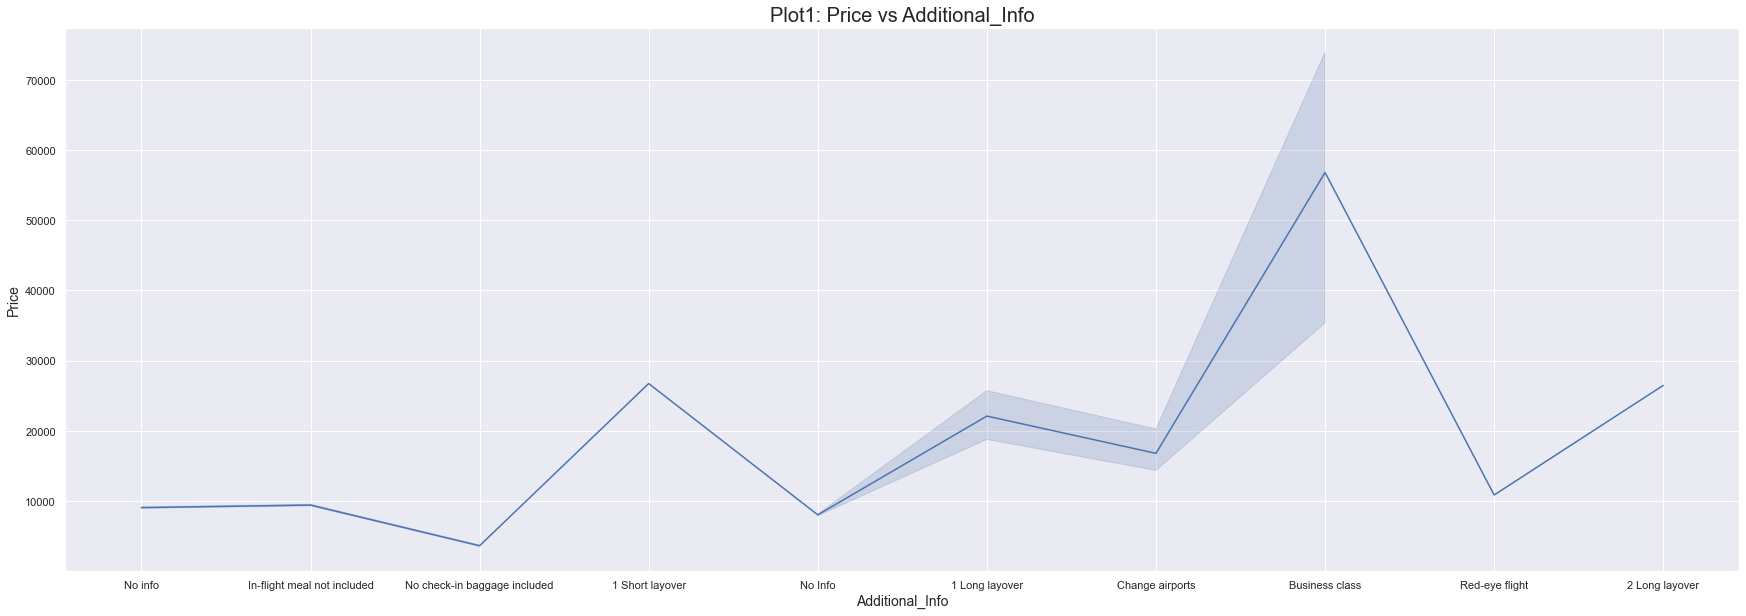

In [4959]:
#visualize this column by lineplot
plt.figure(figsize=(30,10))
sns.lineplot(y= 'Price',x= 'Additional_Info', data=df1)
plt.xlabel('Additional_Info', fontsize = 14)
plt.ylabel('Price', fontsize = 14)
plt.title('Plot1: Price vs Additional_Info', fontsize=20)

Observation:
- Results by EDA
1. No info category have more numbers in both the dataset
2. we can see in relationship between additional-info and total_stops that 1 stops, 2 stops peoples are high with no info
3. In plot1. prices for Bussiness class peoples are high and low for no-info 

In [4960]:
#check the shape of our dataset
print('Actual shape of Train Dataset:-------->', df1.shape)
time.sleep(1)
print('Actual shape of Test Dataset:-------->', df2.shape)
time.sleep(1)
print('Actual shape of Sample Dataset:-------->', df3.shape)

Actual shape of Train Dataset:--------> (10462, 12)
Actual shape of Test Dataset:--------> (2645, 11)
Actual shape of Sample Dataset:--------> (2462, 1)


In [4961]:
#Label: Price

In [4962]:
df1['Price'].unique() #check the unique value

array([ 3897,  7662, 13882, ...,  9790, 12352, 12648], dtype=int64)

In [4963]:
df3['Price'].unique() #check the unique value

array([15998, 16612, 25572, ..., 22720, 23544, 27489], dtype=int64)

In [4964]:
df1['Price'].value_counts() #check the counts 0f unique value

10262    258
10844    212
7229     161
4804     160
4823     131
        ... 
10759      1
19172      1
4839       1
6633       1
4098       1
Name: Price, Length: 1870, dtype: int64

In [4965]:
df3['Price'].value_counts() #check the counts 0f unique value

28672    1
17091    1
19126    1
25271    1
12985    1
        ..
27979    1
13644    1
23885    1
15699    1
15433    1
Name: Price, Length: 2462, dtype: int64

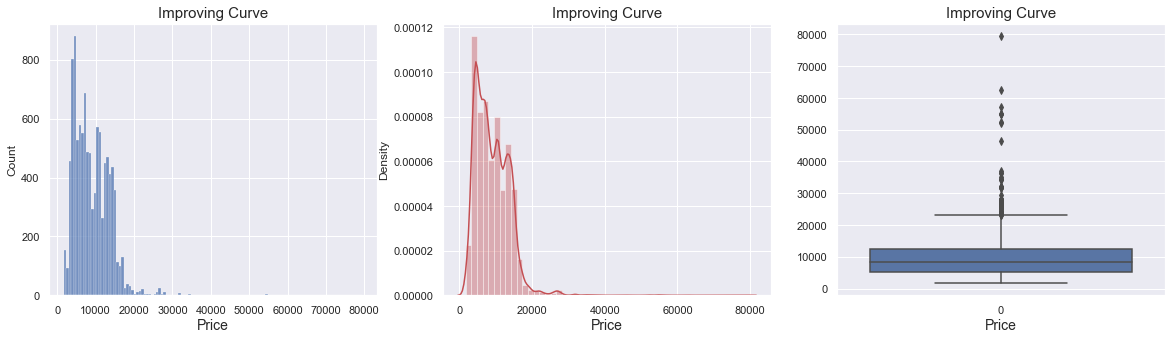

In [4966]:
#Visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df1['Price']) #visualize the outliers by using histplot
plt.title('Improving Curve', fontsize=15)
plt.xlabel('Price', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df1['Price'], color='r') #visualize the normalization curve by using distplot
plt.title('Improving Curve', fontsize=15)
plt.xlabel('Price', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(data = df1['Price']) #visualize the outliers by using boxplot
plt.title('Improving Curve', fontsize=15)
plt.xlabel('Price', fontsize= 14)
plt.show()

In [4967]:
#Detecting the outlier by using iqr method and removing them.
q1 = np.percentile(df1['Price'], 25,
                   interpolation = 'midpoint')
 
q3 = np.percentile(df1['Price'], 75,
                   interpolation = 'midpoint')
iqr = q3 - q1
print('Inter quartile range:------>',iqr)
print("\n",'*'*50)

# higher side 
higher_side = df1['Price'] >= (q3+1.5*iqr)
print('Higher range:-\n',np.where(higher_side))
print("\n",'*'*50)

# lower side 
lower_side = df1['Price'] <= (q1-1.5*iqr)
print('Lower range:- \n',np.where(lower_side))

Inter quartile range:------> 7119.5

 **************************************************
Higher range:-
 (array([  123,   396,   486,   510,   597,   628,   657,   784,   825,
         935,   945,   958,   974,  1194,  1244,  1339,  1420,  1462,
        1474,  1625,  1650,  1778,  1909,  2044,  2087,  2096,  2483,
        2543,  2604,  2621,  2677,  2904,  3010,  3088,  3231,  3372,
        3505,  3667,  3974,  4476,  4779,  4960,  5080,  5312,  5378,
        5597,  5636,  5645,  5654,  5673,  5680,  5789,  5916,  6240,
        6332,  6497,  6509,  6526,  6902,  7254,  7259,  7280,  7438,
        7455,  7516,  7609,  7620,  7650,  7795,  7910,  7968,  8326,
        8345,  8409,  8467,  8798,  8815,  8846,  8875,  9039,  9082,
        9456,  9537,  9786,  9863,  9921,  9966,  9988,  9994, 10148,
       10159, 10178, 10231, 10301], dtype=int64),)

 **************************************************
Lower range:- 
 (array([], dtype=int64),)


In [4968]:
#First print the old shape and then compare
print("old Shape:------> ", df1.shape)
#removing the outliers
high=np.where(higher_side)
low=np.where(lower_side)
df1=df1.drop(df1.index[high])
df1=df1.drop(df1.index[low])
 
print("New Shape:------> ", df1.shape)

old Shape:------>  (10462, 12)
New Shape:------>  (10368, 12)


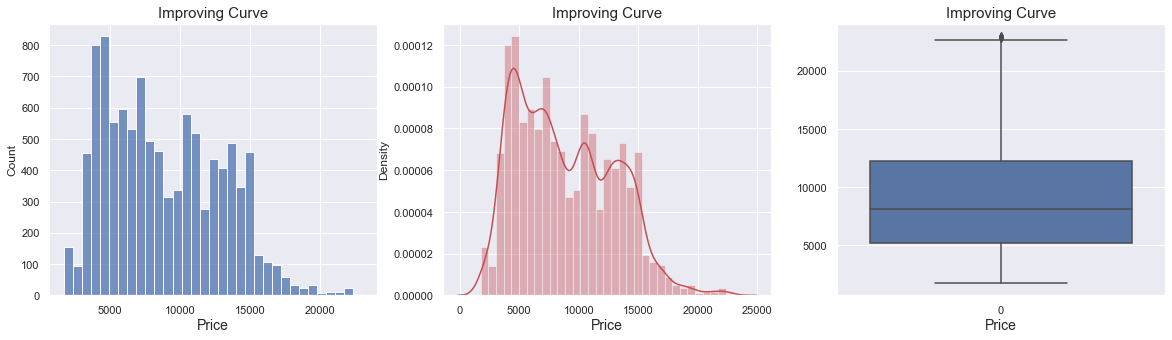

In [4969]:
#Visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df1['Price']) #visualize the outliers by using histplot
plt.title('Improving Curve', fontsize=15)
plt.xlabel('Price', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df1['Price'], color='r') #visualize the normalization curve by using distplot
plt.title('Improving Curve', fontsize=15)
plt.xlabel('Price', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(data = df1['Price']) #visualize the outliers by using boxplot
plt.title('Improving Curve', fontsize=15)
plt.xlabel('Price', fontsize= 14)
plt.show()

In [4970]:
#Detecting the outlier by using iqr method and removing them.
q1 = np.percentile(df1['Price'], 25,
                   interpolation = 'midpoint')
 
q3 = np.percentile(df1['Price'], 75,
                   interpolation = 'midpoint')
iqr = q3 - q1
print('Inter quartile range:------>',iqr)
print("\n",'*'*50)

# higher side 
higher_side = df1['Price'] >= (q3+1.5*iqr)
print('Higher range:-\n',np.where(higher_side))
print("\n",'*'*50)

# lower side 
lower_side = df1['Price'] <= (q1-1.5*iqr)
print('Lower range:- \n',np.where(lower_side))

Inter quartile range:------> 7023.0

 **************************************************
Higher range:-
 (array([4587, 6970, 8642, 8828], dtype=int64),)

 **************************************************
Lower range:- 
 (array([], dtype=int64),)


In [4971]:
#First print the old shape and then compare
print("old Shape:------> ", df1.shape)
#removing the outliers
high=np.where(higher_side)
low=np.where(lower_side)
df1=df1.drop(df1.index[high])
df1=df1.drop(df1.index[low])
 
print("New Shape:------> ", df1.shape)

old Shape:------>  (10368, 12)
New Shape:------>  (10364, 12)


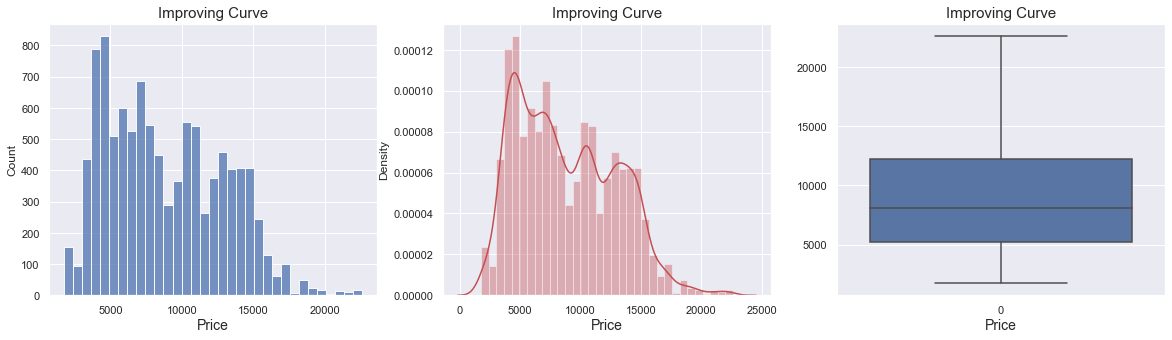

In [4972]:
#Visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df1['Price']) #visualize the outliers by using histplot
plt.title('Improving Curve', fontsize=15)
plt.xlabel('Price', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df1['Price'], color='r') #visualize the normalization curve by using distplot
plt.title('Improving Curve', fontsize=15)
plt.xlabel('Price', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(data = df1['Price']) #visualize the outliers by using boxplot
plt.title('Improving Curve', fontsize=15)
plt.xlabel('Price', fontsize= 14)
plt.show()

In [4973]:
# calculate the mean, median, mode to check how much our column is skewed  
print('mean of the column-------> ',df1['Price'].mean())
print('median of the column--------> ',df1['Price'].median())
print('mode of the column--------> ', st.mode(df1['Price']))
print('std of the column:----->',df1['Price'].std())

mean of the column------->  8827.380451563104
median of the column-------->  8099.0
mode of the column-------->  10262
std of the column:-----> 4060.654492248873


In [4974]:
df1['Price'] = df1['Price'].replace(10262, df1['Price'].mean())

In [4975]:
# calculate the mean, median, mode to check how much our column is skewed  
print('mean of the column-------> ',df1['Price'].mean())
print('median of the column--------> ',df1['Price'].median())
print('mode of the column--------> ', st.mode(df1['Price']))
print('std of the column:----->',df1['Price'].std())

mean of the column------->  8791.667228531722
median of the column-------->  8099.0
mode of the column-------->  8827.380451563104
std of the column:-----> 4054.182965299764


In [4976]:
df1['Price'] = df1['Price'].replace(8827.380451563104, df1['Price'].mean())

In [4977]:
# calculate the mean, median, mode to check how much our column is skewed  
print('mean of the column-------> ',df1['Price'].mean())
print('median of the column--------> ',df1['Price'].median())
print('mode of the column--------> ', st.mode(df1['Price']))
print('std of the column:----->',df1['Price'].std())

mean of the column------->  8790.778188437062
median of the column-------->  8099.0
mode of the column-------->  8791.667228531722
std of the column:-----> 4054.1789516630165


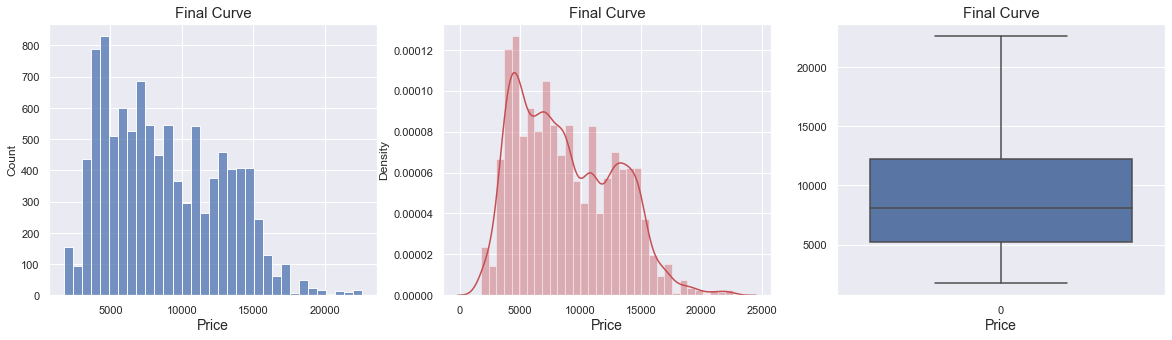

In [4978]:
#Visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df1['Price']) #visualize the outliers by using histplot
plt.title('Final Curve', fontsize=15)
plt.xlabel('Price', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df1['Price'], color='r') #visualize the normalization curve by using distplot
plt.title('Final Curve', fontsize=15)
plt.xlabel('Price', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(data = df1['Price']) #visualize the outliers by using boxplot
plt.title('Final Curve', fontsize=15)
plt.xlabel('Price', fontsize= 14)
plt.show()

In [4979]:
#check the shape of our dataset
print('Actual shape of Train Dataset:-------->', df1.shape)
time.sleep(1)
print('Actual shape of Test Dataset:-------->', df2.shape)

Actual shape of Train Dataset:--------> (10364, 12)
Actual shape of Test Dataset:--------> (2645, 11)


In [4980]:
df1.drop(columns='Date_of_Journey',inplace = True) #drop the column

In [4981]:
df2.drop(columns='Date_of_Journey',inplace = True)#drop the column

In [4982]:
df1['Dep_Time'] = df1['Dep_Time'].str.split(':')
time.sleep(1)
df2['Dep_Time'] = df2['Dep_Time'].str.split(':')

In [4983]:
df1['Dep_Time_hours'] = df1.Dep_Time.str[0]
df1['Dep_Time_mins'] = df1.Dep_Time.str[1]
time.sleep(1)
df2['Dep_Time_hours'] = df2.Dep_Time.str[0]
df2['Dep_Time_mins'] = df2.Dep_Time.str[1]

In [4984]:
df1['Arrival_Time'] = df1['Arrival_Time'].str.split(':')
time.sleep(1)
df2['Arrival_Time'] = df2['Arrival_Time'].str.split(':')

In [4985]:
df1['Arrival_Time_hours'] = df1.Arrival_Time.str[0]
df1['Arrival_Time_mins'] = df1.Arrival_Time.str[1]
time.sleep(1)
df2['Arrival_Time_hours'] = df2.Arrival_Time.str[0]
df2['Arrival_Time_mins'] = df2.Arrival_Time.str[1]

In [4986]:
df1['Duration'] = df1['Duration'].str.split(' ')
time.sleep(1)
df2['Duration'] = df2['Duration'].str.split(' ')

In [4987]:
df1['Duration_hours'] = df1['Duration'].str[0]
df1['Duration_mins'] = df1['Duration'].str[1]
time.sleep(1)
df2['Duration_hours'] = df2['Duration'].str[0]
df2['Duration_mins'] = df2['Duration'].str[1]

In [4988]:
df1['Duration_hours'] = df1['Duration_hours'].str.split('h')
df1['Duration_mins'] = df1['Duration_mins'].str.split('m')
time.sleep(1)
df2['Duration_hours'] = df2['Duration_hours'].str.split('h')
df2['Duration_mins'] = df2['Duration_mins'].str.split('m')

In [4989]:
df1['Duration_hours'] = df1['Duration_hours'].str[0]
df1['Duration_mins'] = df1['Duration_mins'].str[0]
time.sleep(1)
df2['Duration_hours'] = df2['Duration_hours'].str[0]
df2['Duration_mins'] = df2['Duration_mins'].str[0]

In [4990]:
df1['Duration_hours'] = df1['Duration_hours'].str.split('m')
df2['Duration_hours'] = df2['Duration_hours'].str.split('m')
time.sleep(2)
df1['Duration_hours'] = df1['Duration_hours'].str[0]
df2['Duration_hours'] = df2['Duration_hours'].str[0]

In [4991]:
df1['Duration_hours'].unique()

array(['2', '7', '19', '5', '4', '15', '21', '25', '13', '12', '26', '22',
       '23', '20', '10', '6', '11', '8', '16', '3', '27', '1', '14', '9',
       '18', '17', '24', '30', '28', '29', '37', '34', '38', '35', '36',
       '47', '33', '32', '31', '42', '39', '41', '40'], dtype=object)

In [4992]:
df1['Duration_mins'].unique()

array(['50', '25', nan, '45', '30', '5', '15', '35', '10', '20', '55',
       '40'], dtype=object)

In [4993]:
df2['Duration_mins'].unique()

array(['55', nan, '45', '50', '20', '5', '15', '40', '10', '35', '30',
       '25'], dtype=object)

In [4994]:
lab_enc = LabelEncoder() #using Label Encoder to transform our column data
df1['Airline'] = pd.Series(lab_enc.fit_transform(df1['Airline']))
df1['Source'] = pd.Series(lab_enc.fit_transform(df1['Source']))
df1['Destination'] = pd.Series(lab_enc.fit_transform(df1['Destination']))
df1['Total_Stops'] = pd.Series(lab_enc.fit_transform(df1['Total_Stops']))
df1['Additional_Info'] = pd.Series(lab_enc.fit_transform(df1['Additional_Info']))

time.sleep(2)

lab_enc = LabelEncoder() #using Label Encoder to transform our column data
df2['Airline'] = pd.Series(lab_enc.fit_transform(df2['Airline']))
df2['Source'] = pd.Series(lab_enc.fit_transform(df2['Source']))
df2['Destination'] = pd.Series(lab_enc.fit_transform(df2['Destination']))
df2['Total_Stops'] = pd.Series(lab_enc.fit_transform(df2['Total_Stops']))
df2['Additional_Info'] = pd.Series(lab_enc.fit_transform(df2['Additional_Info']))

In [4995]:
print("Null values of df1:\n",df1.isnull().sum())
time.sleep(2)
print("Null values of df2:\n",df2.isnull().sum())

Null values of df1:
 Airline                299
Source                 299
Destination            299
Dep_Time                 0
Arrival_Time             0
Duration                 0
Total_Stops            299
Additional_Info        299
Price                    0
Day_of_Journey           0
Month_of_Journey         0
Dep_Time_hours           0
Dep_Time_mins            0
Arrival_Time_hours       0
Arrival_Time_mins        0
Duration_hours           0
Duration_mins         1002
dtype: int64
Null values of df2:
 Airline                26
Source                 26
Destination            26
Dep_Time                0
Arrival_Time            0
Duration                0
Total_Stops            26
Additional_Info        26
Day_of_Journey          0
Month_of_Journey        0
Dep_Time_hours          0
Dep_Time_mins           0
Arrival_Time_hours      0
Arrival_Time_mins       0
Duration_hours          0
Duration_mins         252
dtype: int64


In [4996]:
df1.dropna(inplace=True) #drop the null values
time.sleep(1)
df2.dropna(inplace=True) #drop the null values

In [4998]:
df1.drop(columns='Dep_Time',inplace=True)
time.sleep(1)
df1.drop(columns='Arrival_Time',inplace=True)
time.sleep(1)
df1.drop(columns='Duration',inplace=True)

In [5002]:
df2.drop(columns='Dep_Time',inplace=True)
time.sleep(1)
df2.drop(columns='Arrival_Time',inplace=True)
time.sleep(1)
df2.drop(columns='Duration',inplace=True)

In [4999]:
df1['Dep_Time_hours'] = df1['Dep_Time_hours'].astype('int64')
df1['Dep_Time_mins'] = df1['Dep_Time_mins'].astype('int64')
df1['Arrival_Time_hours'] = df1['Arrival_Time_hours'].astype('int64')
df1['Arrival_Time_mins'] = df1['Arrival_Time_mins'].astype('int64')
df1['Duration_hours'] = df1['Duration_hours'].astype('int64')
df1['Duration_mins'] = df1['Duration_mins'].astype('int64')

time.sleep(2)

df2['Dep_Time_hours'] = df2['Dep_Time_hours'].astype('int64')
df2['Dep_Time_mins'] = df2['Dep_Time_mins'].astype('int64')
df2['Arrival_Time_hours'] = df2['Arrival_Time_hours'].astype('int64')
df2['Arrival_Time_mins'] = df2['Arrival_Time_mins'].astype('int64')
df2['Duration_hours'] = df2['Duration_hours'].astype('int64')
df2['Duration_mins'] = df2['Duration_mins'].astype('int64')

In [5000]:
df1.isnull().sum() #check the null values

Airline               0
Source                0
Destination           0
Total_Stops           0
Additional_Info       0
Price                 0
Day_of_Journey        0
Month_of_Journey      0
Dep_Time_hours        0
Dep_Time_mins         0
Arrival_Time_hours    0
Arrival_Time_mins     0
Duration_hours        0
Duration_mins         0
dtype: int64

In [5003]:
df2.isnull().sum() #check the null values

Airline               0
Source                0
Destination           0
Total_Stops           0
Additional_Info       0
Day_of_Journey        0
Month_of_Journey      0
Dep_Time_hours        0
Dep_Time_mins         0
Arrival_Time_hours    0
Arrival_Time_mins     0
Duration_hours        0
Duration_mins         0
dtype: int64

In [5004]:
df1.dropna(inplace=True) #drop the null values
time.sleep(1)
df2.dropna(inplace=True) #drop the null values

In [5005]:
df1.isnull().sum() #check the null values

Airline               0
Source                0
Destination           0
Total_Stops           0
Additional_Info       0
Price                 0
Day_of_Journey        0
Month_of_Journey      0
Dep_Time_hours        0
Dep_Time_mins         0
Arrival_Time_hours    0
Arrival_Time_mins     0
Duration_hours        0
Duration_mins         0
dtype: int64

In [5006]:
df2.isnull().sum() #check the null values

Airline               0
Source                0
Destination           0
Total_Stops           0
Additional_Info       0
Day_of_Journey        0
Month_of_Journey      0
Dep_Time_hours        0
Dep_Time_mins         0
Arrival_Time_hours    0
Arrival_Time_mins     0
Duration_hours        0
Duration_mins         0
dtype: int64

In [5007]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9083 entries, 0 to 10363
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Airline             9083 non-null   float64
 1   Source              9083 non-null   float64
 2   Destination         9083 non-null   float64
 3   Total_Stops         9083 non-null   float64
 4   Additional_Info     9083 non-null   float64
 5   Price               9083 non-null   float64
 6   Day_of_Journey      9083 non-null   int64  
 7   Month_of_Journey    9083 non-null   int64  
 8   Dep_Time_hours      9083 non-null   int64  
 9   Dep_Time_mins       9083 non-null   int64  
 10  Arrival_Time_hours  9083 non-null   int64  
 11  Arrival_Time_mins   9083 non-null   int64  
 12  Duration_hours      9083 non-null   int64  
 13  Duration_mins       9083 non-null   int64  
dtypes: float64(6), int64(8)
memory usage: 1.0 MB


In [5008]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2368 entries, 0 to 2644
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Airline             2368 non-null   float64
 1   Source              2368 non-null   float64
 2   Destination         2368 non-null   float64
 3   Total_Stops         2368 non-null   float64
 4   Additional_Info     2368 non-null   float64
 5   Day_of_Journey      2368 non-null   int64  
 6   Month_of_Journey    2368 non-null   int64  
 7   Dep_Time_hours      2368 non-null   int64  
 8   Dep_Time_mins       2368 non-null   int64  
 9   Arrival_Time_hours  2368 non-null   int64  
 10  Arrival_Time_mins   2368 non-null   int64  
 11  Duration_hours      2368 non-null   int64  
 12  Duration_mins       2368 non-null   int64  
dtypes: float64(5), int64(8)
memory usage: 259.0 KB


In [5010]:
df1.shape

(9083, 14)

In [5011]:
#split x and y
x = df1.drop(['Price'], axis=1)
y=df1.Price

In [5012]:
#scale the value x for train data
Scaler = StandardScaler()
x_scaled = Scaler.fit_transform(x)
x_scaled

array([[-0.35995367, -1.67319497,  2.46686756, ..., -0.95355694,
        -0.9394663 ,  1.26061887],
       [-1.34221572,  0.87560254, -0.97225296, ..., -0.64587816,
        -0.34409823, -0.41809935],
       [-0.35995367,  0.87560254, -0.97225296, ...,  0.27715818,
        -0.58224546, -0.41809935],
       ...,
       [ 0.13117735, -1.67319497,  0.40339524, ...,  0.58483696,
        -0.34409823,  1.59636252],
       [ 2.58683247, -1.67319497,  2.46686756, ..., -0.0305206 ,
        -0.46317184, -1.76107392],
       [-1.34221572,  0.02600337, -0.28442886, ...,  0.58483696,
         0.60849068, -1.42533028]])

In [5013]:
# Check the multicollinearity between the features
#import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["vif"]= [ variance_inflation_factor(x_scaled, i)
               for i in range ( x_scaled.shape[1])]
vif['features']= x.columns
vif 

,vif,features
0,1.019352,Airline
1,1.504687,Source
2,1.623035,Destination
3,1.170078,Total_Stops
4,1.045256,Additional_Info
5,1.088031,Day_of_Journey
6,1.091857,Month_of_Journey
7,1.005930,Dep_Time_hours
8,1.034297,Dep_Time_mins
9,1.030087,Arrival_Time_hours


In [5014]:
#scale the value x for test data
Scaler = StandardScaler()
x_scaled1 = Scaler.fit_transform(df2)
x_scaled1

array([[ 0.00627358,  0.01640309, -0.29649219, ..., -0.01840735,
        -0.00586041,  1.6091772 ],
       [ 0.00627358,  0.01640309, -0.29649219, ..., -1.54248435,
         1.53607914,  0.9273859 ],
       [-1.74147318, -1.67240169,  0.38383097, ...,  1.20085425,
        -0.95474629,  1.26828155],
       ...,
       [ 0.00627358,  0.01640309, -0.29649219, ...,  0.59122345,
         0.34997179,  0.9273859 ],
       [-1.30453649,  0.01640309, -0.29649219, ..., -0.01840735,
         1.53607914,  0.58649024],
       [ 0.88014697,  0.01640309, -0.29649219, ..., -1.54248435,
         0.11275032, -0.09530107]])

In [5015]:
# Check the multicollinearity between the features
#import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["vif"]= [ variance_inflation_factor(x_scaled1, i)
               for i in range ( x_scaled1.shape[1])]
vif['features']= x.columns
vif 

,vif,features
0,1.017853,Airline
1,1.477328,Source
2,1.599992,Destination
3,1.159056,Total_Stops
4,1.033275,Additional_Info
5,1.077030,Day_of_Journey
6,1.083172,Month_of_Journey
7,1.009022,Dep_Time_hours
8,1.044978,Dep_Time_mins
9,1.029379,Arrival_Time_hours


In [5016]:
#split data into train and test.
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y,test_size = 0.25, random_state=13)

In [5017]:
y_train.head()

3490     5198.0
9115     7804.0
2162    12898.0
6075    16655.0
4525     7468.0
Name: Price, dtype: float64

In [5018]:
#Using regression models to check accuracy

In [5032]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor #import library
from sklearn import metrics
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [5033]:
#Model instantiating and training
lr = LinearRegression()
dtr=DecisionTreeRegressor()
rfo = RandomForestRegressor()
svr = SVR()
knn = KNeighborsRegressor()

In [5034]:
print('Linear Regression:----->',lr.fit(x_train, y_train))
time.sleep(2)
print('Decsion Tree:------->',dtr.fit(x_train, y_train))
time.sleep(2)
print('Random Forest:-------->',rfo.fit(x_train, y_train))
time.sleep(2)
print('Support vector machine:-------->',svr.fit(x_train, y_train))
time.sleep(2)
print('KNeighborsRegressor:-------->',knn.fit(x_train, y_train))

Linear Regression:-----> LinearRegression()
Decsion Tree:-------> DecisionTreeRegressor()
Random Forest:--------> RandomForestRegressor()
Support vector machine:--------> SVR()
KNeighborsRegressor:--------> KNeighborsRegressor()


In [5035]:
#Check How much our model learn
print('Linear regression Score:-------->', lr.score(x_train, y_train))
time.sleep(2)
print('Decision Tree score:------->', dtr.score(x_train,y_train))
time.sleep(2)
print('Random Forest score:------>',rfo.score(x_train, y_train))
time.sleep(2)
print('Support vector machine score:------>',svr.score(x_train, y_train))
time.sleep(2)
print('KNeighborsRegressor score:------>',knn.score(x_train, y_train))

Linear regression Score:--------> 0.36021535134817606
Decision Tree score:-------> 0.9981691526396266
Random Forest score:------> 0.9654283780774382
Support vector machine score:------> 0.012282106486902422
KNeighborsRegressor score:------> 0.5861101483507274


In [5036]:
#Let's check how well model fits the test data
print('Linear regression Score:-------->', lr.score(x_test, y_test))
time.sleep(2)
print('Decision Tree score:------->', dtr.score(x_test,y_test))
time.sleep(2)
print('Random Forest score:------>',rfo.score(x_test, y_test))
time.sleep(2)
print('Support vector machine score:------>',svr.score(x_test, y_test))
time.sleep(2)
print('KNeighborsRegressor score:------>',knn.score(x_test, y_test))

Linear regression Score:--------> 0.30942208604870547
Decision Tree score:-------> 0.5709346134263964
Random Forest score:------> 0.7459557873089817
Support vector machine score:------> 0.005947854407253095
KNeighborsRegressor score:------> 0.3516227928910325


In [5037]:
y_pred_lr = lr.predict(x_test)#save the predictions in some variables
y_pred_dtr = dtr.predict(x_test)
y_pred_rfo = rfo.predict(x_test)
y_pred_svr = svr.predict(x_test)
y_pred_knn = knn.predict(x_test)

Linear Regression:


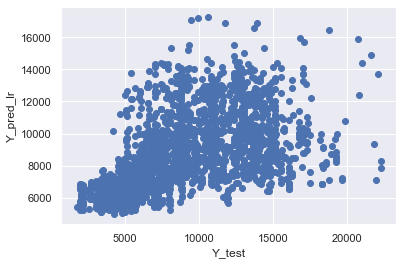

Decision Tree:


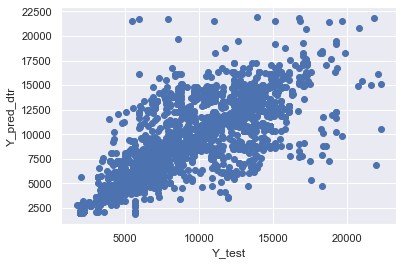

Random Forest:


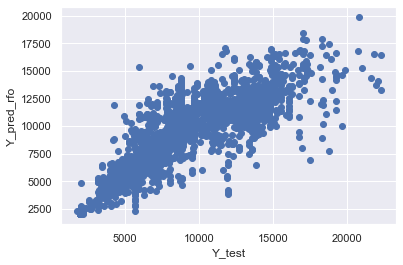

Support vector machine:


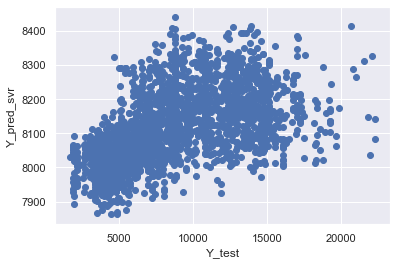

KNeighbors:


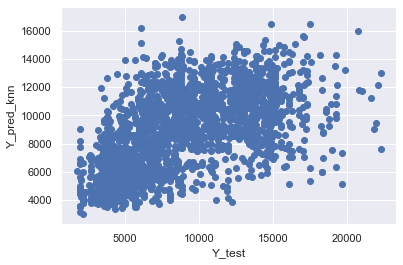

In [5038]:
#plot the actual and predicted value
print("Linear Regression:")
plt.scatter(y_test,y_pred_lr)
plt.xlabel('Y_test')
plt.ylabel('Y_pred_lr')
plt.show()
time.sleep(2)
print("Decision Tree:")
plt.scatter(y_test,y_pred_dtr)
plt.xlabel('Y_test')
plt.ylabel('Y_pred_dtr')
plt.show()
time.sleep(2)
print("Random Forest:")
plt.scatter(y_test,y_pred_rfo)
plt.xlabel('Y_test')
plt.ylabel('Y_pred_rfo')
plt.show()
time.sleep(2)
print("Support vector machine:")
plt.scatter(y_test,y_pred_svr)
plt.xlabel('Y_test')
plt.ylabel('Y_pred_svr')
plt.show()
time.sleep(2)
print("KNeighbors:")
plt.scatter(y_test,y_pred_knn)
plt.xlabel('Y_test')
plt.ylabel('Y_pred_knn')
plt.show()

In [5039]:
#calculate Mean absolute error
print("Linear Regression:")
print('MAE:--------->',mean_absolute_error(y_test, y_pred_lr))#calculate Mean absolute error
time.sleep(1)
print('MSE:----------->',mean_squared_error(y_test,y_pred_lr))#calculate mean squared error
time.sleep(1)
print('RSME:--------->',np.sqrt(mean_squared_error(y_test,y_pred_lr)))#calculate root mean square error

time.sleep(2)
print("Decision Tree:")
print('MAE:--------->',mean_absolute_error(y_test, y_pred_dtr))#calculate Mean absolute error
time.sleep(1)
print('MSE:----------->',mean_squared_error(y_test,y_pred_dtr))#calculate mean squared error
time.sleep(1)
print('RSME:--------->',np.sqrt(mean_squared_error(y_test,y_pred_dtr)))#calculate root mean square error
time.sleep(2)
print("Random Forest:")
print('MAE:--------->',mean_absolute_error(y_test, y_pred_rfo))#calculate Mean absolute error
time.sleep(1)
print('MSE:----------->',mean_squared_error(y_test,y_pred_rfo))#calculate mean squared error
time.sleep(1)
print('RSME:--------->',np.sqrt(mean_squared_error(y_test,y_pred_rfo)))#calculate root mean square error
time.sleep(2)
print("Support vector machine:")
print('MAE:--------->',mean_absolute_error(y_test, y_pred_svr))#calculate Mean absolute error
time.sleep(1)
print('MSE:----------->',mean_squared_error(y_test,y_pred_svr))#calculate mean squared error
time.sleep(1)
print('RSME:--------->',np.sqrt(mean_squared_error(y_test,y_pred_svr)))#calculate root mean square error
time.sleep(2)
print("KNeighbors:")
print('MAE:--------->',mean_absolute_error(y_test, y_pred_knn))#calculate Mean absolute error
time.sleep(1)
print('MSE:----------->',mean_squared_error(y_test,y_pred_knn))#calculate mean squared error
time.sleep(1)
print('RSME:--------->',np.sqrt(mean_squared_error(y_test,y_pred_knn)))#calculate root mean square error

Linear Regression:
MAE:---------> 2666.0582533827433
MSE:-----------> 11603292.887481444
RSME:---------> 3406.3606514110397
Decision Tree:
MAE:---------> 1659.5396900242279
MSE:-----------> 7209282.613467858
RSME:---------> 2685.0107287435294
Random Forest:
MAE:---------> 1433.4875917268366
MSE:-----------> 4268525.457695735
RSME:---------> 2066.0410106519507
Support vector machine:
MAE:---------> 3386.75231688495
MSE:-----------> 16702356.037924904
RSME:---------> 4086.8516045881706
KNeighbors:
MAE:---------> 2530.9754756176612
MSE:-----------> 10894224.219547186
RSME:---------> 3300.6399712097027


In [ ]:
#Lasso Regression

In [5040]:
#import Ridge, Lasso, RidgeCV, LassoCV
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV

In [5041]:
#to find best alpha
lassocv= LassoCV(alphas=None, max_iter = 1000, normalize = True)

In [5042]:
#train the model
lassocv.fit(x_train,y_train)

LassoCV(normalize=True)

In [5043]:
#best alpha parameter
alpha = lassocv.alpha_
alpha

0.5370273942092234

In [5044]:
#fit the data
lasso_reg = Lasso(alpha)

In [5045]:
lasso_reg.fit(x_train,y_train) #train the data

Lasso(alpha=0.5370273942092234)

In [5046]:
lasso_reg.score(x_test,y_test) #get the score of test data

0.3094386558077932

In [5047]:
# Ridge Regression

In [5048]:
ridgecv= RidgeCV(alphas=np.arange(0.001,0.1,0.01), normalize = True)

In [5049]:
#train the data
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [5050]:
#best alpha parameter
ridgecv.alpha_

0.001

In [5051]:
#fit the data
ridge_model = Ridge(alpha = ridgecv.alpha_)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.001)

In [5052]:
ridge_model.score(x_test,y_test) #get the score

0.309422091739752

In [5053]:
# Ada Boost Regressor

In [5054]:
ada = AdaBoostRegressor() #using this to improve accuracy

In [5055]:
ada_model= ada.fit(x_train,y_train) # fit the data

In [5056]:
y_pred = ada_model.predict(x_test) #predict it

In [5057]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
r2_score(y_test,y_pred) #get the r2score

0.5145896138950434

In [5058]:
# Using RandomSearchCV by using LinearRegression as a estimator

In [5059]:
params = {'n_estimators': [40,47,49,50], 'learning_rate' :[.30,.40,.45]}

In [5060]:
rnd_srch = RandomizedSearchCV(AdaBoostRegressor(), cv =5, param_distributions = params ) 
#using randomsearchCv

In [5061]:
rnd_srch.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=AdaBoostRegressor(),
                   param_distributions={'learning_rate': [0.3, 0.4, 0.45],
                                        'n_estimators': [40, 47, 49, 50]})

In [5062]:
rnd_srch.best_estimator_ 

AdaBoostRegressor(learning_rate=0.3, n_estimators=40)

In [5063]:
ada = AdaBoostRegressor( base_estimator = lr, learning_rate = 0.45, n_estimators = 47)

In [5064]:
ada.fit(x_train,y_train) #fit the data

AdaBoostRegressor(base_estimator=LinearRegression(), learning_rate=0.45,
                  n_estimators=47)

In [5065]:
y_pred = ada.predict(x_test) #predict it

In [5066]:
r2_score(y_test,y_pred) #get the score

0.2490319341758117

In [5067]:
# Using GridSearchCV by using DecisionTree as a estimator

In [5068]:
ada = AdaBoostRegressor( base_estimator = dtr, learning_rate = 0.45, n_estimators = 47)

In [5069]:
ada.fit(x_train,y_train) #fit the data

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(), learning_rate=0.45,
                  n_estimators=47)

In [5070]:
y_pred = ada.predict(x_test) #predict it

In [5071]:
r2_score(y_test,y_pred) #get the score

0.6946624789366672

In [5072]:
# xgboost regressor

In [5073]:
import xgboost as xgb #import libraries
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [5074]:
xgbr = xgb.XGBRegressor()  #to improve accuracy
xgbr.fit(x_train,y_train)
y_pred = xgbr.predict(x_test)
r2_score(y_test, y_pred)

0.7545484771415243

In [5075]:
# GradientBoostingRegressor

In [5076]:
gradientregressor = GradientBoostingRegressor(max_depth=3, n_estimators=6, learning_rate=.4) 
#using GBR

In [5077]:
gbr = gradientregressor.fit(x_train,y_train) #fit the data

In [5078]:
r2_score(y_test,y_pred) #predict it

0.7545484771415243

In [5079]:
# Using GridSearchCV for GBR to improve accuracy

In [5080]:
grid_params = {
    'max_depth': range(4,12,2),
    'learning_rate': np.arange(0.1,1,0.1),
    'min_samples_split': range(4,8,2)
}

In [5081]:
grid = GridSearchCV(gbr, param_grid = grid_params)

In [5082]:
grid.fit(x_train, y_train) #fit the data

GridSearchCV(estimator=GradientBoostingRegressor(learning_rate=0.4,
                                                 n_estimators=6),
             param_grid={'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'max_depth': range(4, 12, 2),
                         'min_samples_split': range(4, 8, 2)})

In [5083]:
grid.best_params_ # get the best parameters

{'learning_rate': 0.5, 'max_depth': 8, 'min_samples_split': 4}

In [5084]:
a = grid.best_estimator_

In [5085]:
a.fit(x_train,y_train) # fit the data

GradientBoostingRegressor(learning_rate=0.5, max_depth=8, min_samples_split=4,
                          n_estimators=6)

In [5086]:
y_pred = a.predict(x_test) # predict it

In [5087]:
r2_score(y_test, y_pred) # get the improved r2 score

0.7345298627733283

In [5090]:
params = {'n_estimators':[13,15],
         'max_depth':[10,15],
         'min_samples_split':[10,11],
         'min_samples_leaf':[5,6]}
gridsearch = GridSearchCV(estimator=RandomForestRegressor(), param_grid= params)#apply GridSearchCV
time.sleep(2)
print(gridsearch.fit(x_train,y_train)) #train the model
time.sleep(1)
print("\n",'*'*50)
time.sleep(1)
print('GridSearchCV best parameters:----->',gridsearch.best_params_) #get best parameters
time.sleep(1)
print("\n",'*'*50)
time.sleep(1)
#put best params into knn
rfc = gridsearch.best_estimator_
print('Trained Model using best parameters:----->',rfc.fit(x_train,y_train)) #train the model
time.sleep(1)
print("\n",'*'*50)
time.sleep(1)
print('Accuracy score:------>',rfc.score(x_train,y_train))#check the accuracy score

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [10, 15], 'min_samples_leaf': [5, 6],
                         'min_samples_split': [10, 11],
                         'n_estimators': [13, 15]})

 **************************************************
GridSearchCV best parameters:-----> {'max_depth': 15, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 13}

 **************************************************
Trained Model using best parameters:-----> RandomForestRegressor(max_depth=15, min_samples_leaf=5, min_samples_split=10,
                      n_estimators=13)

 **************************************************
Accuracy score:------> 0.8493320986697848


In [5088]:
# Saving the model

In [ ]:
#We see,By using gridsearchCv and Randomforest as a estimator is giving 84.9% accuracy, 
#so, this is our best model

In [5094]:
with open('Flight_price_prediction','wb') as f:
     pickle.dump(RandomForestRegressor(),f)